DO NOT RUN ALL CELLS!!!!

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import numpy.linalg as la
import math
import random
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Sets up the basic class for creating the objects in the solar system
class makeplanet:
    #This will create the planet and assign the necessary elements to each planet (i.e. Name, Mass, Position, Velocity)
    def __init__(self,name, mass, x,y,z,vx,vy,vz):
        self.name = name
        self.mass = mass
        self.x = x
        self.y = y
        self.z = z
        self.vx = 365*vx
        self.vy = 365*vy
        self.vz = 365*vz
        
    def changeposx(self,xnew):
        self.x = xnew
    def changeposy(self,xnew):
        self.y = ynew
    def changeposz(self,xnew):
        self.z = znew
    def changevelx(self, vxnew):
        self.vx = vxnew
    def changevely(self, vynew):
        self.vy = vynew
    def changevelz(self, vznew):
        self.vz = vznew
    

In [5]:
'''
These next two functions will conveniently remove the velocity and position of the planet in the form of a 1D that
can be iterated over and indexed and all of the nice things that we like to do with arrays.
'''
def position(planet):
    return [planet.x, planet.y, planet.z]
    
def velocity(planet):
    return [planet.vx, planet.vy, planet.vz]

def r(planet):
    return (planet.x**2+ planet.y**2+ planet.z**2)**(0.5)

def rbetween(x1,y1,z1,x2,y2,z2):
    return ((x1-x2)**2+ (y1-y2)**2+ (z1-z2)**2)**(0.5)

In [6]:
sun = makeplanet("Sun", 1.00, 0.0,0.0,0.0,0.0,0.0,0.0)

The following few cells will be a test of the makeplanet class. I will test the ability of the class to extrapolate the velocity and position of the planet as well as the mass. These are important.

In [7]:
position(sun)

[0.0, 0.0, 0.0]

In [8]:
velocity(sun)

[0.0, 0.0, 0.0]

In [9]:
sun.mass

1.0

The functions work. I will now add the Earth. The masses will be entered as ratios of the mass of the sun. The position units will be in AU, and the velocities will be in AU per day, so we will multiply the velocities by 365 to put them in units of AU-yr.

In [10]:
earth = makeplanet("Earth", 3E-6, -9.88E-01, 8.50E-02, -1.52E-04, -1.68E-03, -1.71E-02, 4.35E-07) 

In [11]:
position(earth)

[-0.988, 0.085, -0.000152]

In [12]:
velocity(earth)

[-0.6132000000000001, -6.2415, 0.000158775]

In [13]:
r(earth)

0.9916496473573719

One more thing I want to do before we going to far into things is to make a function that will make 3D Plots for me given some input of x values, y values, and z values.

In [14]:
def plotter(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,s=5)

    ax.set_xlabel('AU x-axis')
    ax.set_ylabel('AU y-axis')
    ax.set_zlabel('Au z-axis')

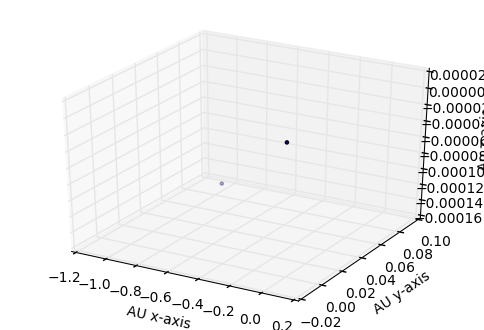

In [13]:
plotter([position(sun)[0],position(earth)[0]],[position(sun)[1],position(earth)[1]],[position(sun)[2],position(earth)[2]])

This is a simple plot of the Earth and the Sun in their respective initial positions.

Now, to figure out our algorithms to do things. (Earth Sun System)

In [14]:
def coorx(xi, h,vxi, axi):
    return xi + h*vxi+h**2*axi/2

def velx(vxi, h, ax_i_1,ax_i):
    return vxi + (h/2)*(ax_i_1+ax_i)

def accx(coor, dist):
    return -4*math.pi**2*coor/(dist**3)


time = 1 #The number of years we want to loop over
h = 1/365 #The step size, defined as one day
n = int(time/h) #The total numbers of iterations

coordinatesx = np.zeros(n+1)
velocitiesx = np.zeros(n+1)

coordinatesx[0] = earth.x
velocitiesx[0] = earth.vx
rad = r(earth)

for i in range(n):
    x_i = coordinatesx[i]
    vx_i = velocitiesx[i]
    ax_i = accx(x_i, rad)
    x_i_1 = coorx(x_i, h,vx_i,ax_i)
    coordinatesx[i+1] = x_i_1
    ax_i_1 = accx(x_i_1, rad)
    vx_i_1 = velx(vx_i,h,ax_i_1,ax_i)
    velocitiesx[i+1] = vx_i_1
#coordinatesx

In [15]:
def coory(yi, h,vyi, ayi):
    return yi + h*vyi+h**2*ayi/2

def vely(vyi, h, ay_i_1,ay_i):
    return vyi + (h/2)*(ay_i_1+ay_i)

def accy(coor, dist):
    return -4*math.pi**2*coor/(dist**3)


time = 1 #The number of years we want to loop over
h = 1/365 #The step size, defined as one day
n = int(time/h) #The total numbers of iterations

coordinatesy = np.zeros(n+1)
velocitiesy = np.zeros(n+1)

coordinatesy[0] = earth.y
velocitiesy[0] = earth.vy
rad = r(earth)

for i in range(n):
    y_i = coordinatesy[i]
    vy_i = velocitiesy[i]
    ay_i = accy(y_i, rad)
    y_i_1 = coory(y_i, h,vy_i,ay_i)
    coordinatesy[i+1] = y_i_1
    ay_i_1 = accy(y_i_1, rad)
    vy_i_1 = vely(vy_i,h,ay_i_1,ay_i)
    velocitiesy[i+1] = vy_i_1
#coordinatesy

In [16]:
def coorz(zi, h,vzi, azi):
    return zi + h*vzi+h**2*azi/2

def velz(vzi, h, az_i_1,az_i):
    return vzi + (h/2)*(az_i_1+az_i)

def accz(coor, dist):
    return -4*math.pi**2*coor/(dist**3)


time = 1 #The number of years we want to loop over
h = 1/365 #The step size, defined as one day
n = int(time/h) #The total numbers of iterations

coordinatesz = np.zeros(n+1)
velocitiesz = np.zeros(n+1)

coordinatesz[0] = earth.z
velocitiesz[0] = earth.vz
rad = r(earth)

for i in range(n):
    z_i = coordinatesz[i]
    vz_i = velocitiesz[i]
    az_i = accz(z_i, rad)
    z_i_1 = coorz(z_i, h,vz_i,az_i)
    coordinatesz[i+1] = z_i_1
    az_i_1 = accz(z_i_1, rad)
    vz_i_1 = velz(vz_i,h,az_i_1,az_i)
    velocitiesz[i+1] = vz_i_1
#coordinatesz

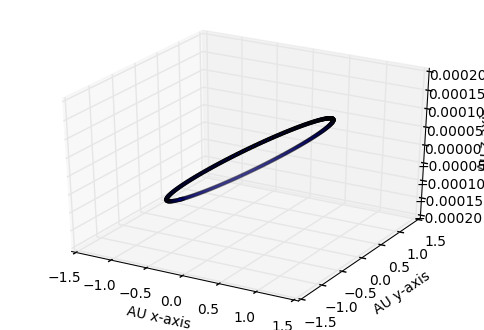

In [17]:
plotter(coordinatesx, coordinatesy, coordinatesz)

We now have a program that will show the plot of the Earth and the Sun interaction. The next step is to put all of our functions into one class and then use that to include additional planets. We will start by adding Jupiter.

In [15]:
jupiter = makeplanet('Jupiter', 0.00095, -5.23, -1.53, 1.23E-01,2.02E-3, -6.88E-03, -1.67E-05)

In [16]:
def oneplanet(t, planet):
    def coorx(xi, h,vxi, axi):
        return xi + h*vxi+h**2*axi/2

    def velx(vxi, h, ax_i_1,ax_i):
        return vxi + (h/2)*(ax_i_1+ax_i)

    def accx(coor, dist):
        return -4*math.pi**2*coor/(dist**3)


    time = t #The number of years we want to loop over
    h = 1/365 #The step size, defined as one day
    n = int(t/h) #The total numbers of iterations

    coordinatesx = np.zeros(n+1)
    velocitiesx = np.zeros(n+1)

    coordinatesx[0] = planet.x
    velocitiesx[0] = planet.vx
    rad = r(planet)

    for i in range(n):
        x_i = coordinatesx[i]
        vx_i = velocitiesx[i]
        ax_i = accx(x_i, rad)
        x_i_1 = coorx(x_i, h,vx_i,ax_i)
        coordinatesx[i+1] = x_i_1
        ax_i_1 = accx(x_i_1, rad)
        vx_i_1 = velx(vx_i,h,ax_i_1,ax_i)
        velocitiesx[i+1] = vx_i_1
        
    def coory(yi, h,vyi, ayi):
        return yi + h*vyi+h**2*ayi/2

    def vely(vyi, h, ay_i_1,ay_i):
        return vyi + (h/2)*(ay_i_1+ay_i)

    def accy(coor, dist):
        return -4*math.pi**2*coor/(dist**3)


    coordinatesy = np.zeros(n+1)
    velocitiesy = np.zeros(n+1)

    coordinatesy[0] = planet.y
    velocitiesy[0] = planet.vy

    for i in range(n):
        y_i = coordinatesy[i]
        vy_i = velocitiesy[i]
        ay_i = accy(y_i, rad)
        y_i_1 = coory(y_i, h,vy_i,ay_i)
        coordinatesy[i+1] = y_i_1
        ay_i_1 = accy(y_i_1, rad)
        vy_i_1 = vely(vy_i,h,ay_i_1,ay_i)
        velocitiesy[i+1] = vy_i_1
        
    def coorz(zi, h,vzi, azi):
        return zi + h*vzi+h**2*azi/2

    def velz(vzi, h, az_i_1,az_i):
        return vzi + (h/2)*(az_i_1+az_i)

    def accz(coor, dist):
        return -4*math.pi**2*coor/(dist**3)

    coordinatesz = np.zeros(n+1)
    velocitiesz = np.zeros(n+1)

    coordinatesz[0] = planet.z
    velocitiesz[0] = planet.vz

    for i in range(n):
        z_i = coordinatesz[i]
        vz_i = velocitiesz[i]
        az_i = accz(z_i, rad)
        z_i_1 = coorz(z_i, h,vz_i,az_i)
        coordinatesz[i+1] = z_i_1
        az_i_1 = accz(z_i_1, rad)
        vz_i_1 = velz(vz_i,h,az_i_1,az_i)
        velocitiesz[i+1] = vz_i_1

    return coordinatesx, coordinatesy, coordinatesz

In [20]:
oneplanet(10, earth)

(array([-0.988     , -0.98952988, -0.99075907, ..., -0.7817774 ,
        -0.77099467, -0.75997766]),
 array([ 0.085     ,  0.06788709,  0.05075354, ..., -0.61516435,
        -0.62847307, -0.6415908 ]),
 array([ -1.52000000e-04,  -1.51541905e-04,  -1.51037760e-04, ...,
         -9.28309093e-05,  -9.06741438e-05,  -8.84898245e-05]))

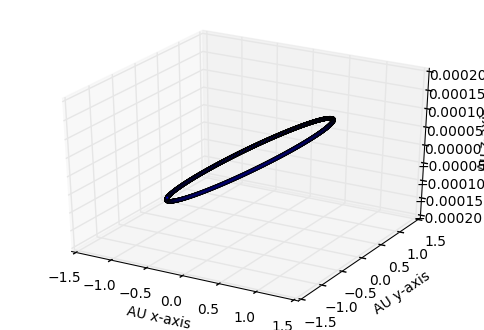

In [21]:
plotter(oneplanet(10,earth)[0], oneplanet(10,earth)[1], oneplanet(10,earth)[2] )

So now I have my iterations defined in one cell. Above I have included the plot for Earth to verify. This is a pre step to optimizing the code before we include multiple planets.

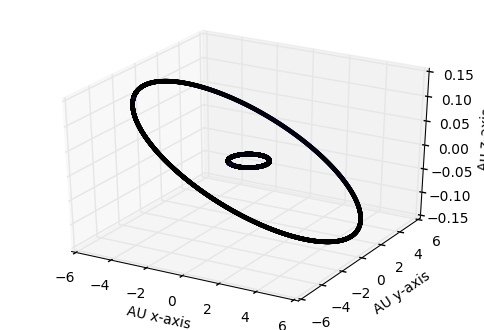

In [22]:
plotter(((oneplanet(13,earth)[0],oneplanet(13,jupiter)[0])),((oneplanet(13,earth)[1],oneplanet(13,jupiter)[1])), ((oneplanet(13,earth)[2],(oneplanet(13,jupiter)[2]))))

This is Jupiter and Earth's orbit, but the interaction between the two has not been programmed in. This code is already getting pretty messy, so once we get these two planets programmed in, we are hopefully going to stumble upon a much slicker way of doing with without the nastiness of the code.

In [47]:
def twoplanet(t, planet1, planet2):
    def coorx(xi, h,vxi, axi):
        return xi + h*vxi+h**2*axi/2

    def velx(vxi, h, ax_i_1,ax_i):
        return vxi + (h/2)*(ax_i_1+ax_i)

    def accx(mass,coor1,coor2, dist, sepdist):
        return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass/(sepdist**3)

    def coory(yi, h,vyi, ayi):
        return yi + h*vyi+h**2*ayi/2

    def vely(vyi, h, ay_i_1,ay_i):
        return vyi + (h/2)*(ay_i_1+ay_i)

    def accy(mass, coor1,coor2, dist, sepdist):
        return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass/(sepdist**3)

    def coorz(zi, h,vzi, azi):
        return zi + h*vzi+h**2*azi/2

    def velz(vzi, h, az_i_1,az_i):
        return vzi + (h/2)*(az_i_1+az_i)

    def accz(mass,coor1,coor2, dist, sepdist):
        return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass/(sepdist**3)


    time = t #The number of years we want to loop over
    h = 1/365 #The step size, defined as one day
    n = int(t/h) #The total numbers of iterations


    coordinatesx1 = np.zeros(n+1)
    velocitiesx1 = np.zeros(n+1)
    coordinatesy1 = np.zeros(n+1)
    velocitiesy1 = np.zeros(n+1)
    coordinatesz1 = np.zeros(n+1)
    velocitiesz1 = np.zeros(n+1)

    coordinatesx2 = np.zeros(n+1)
    velocitiesx2 = np.zeros(n+1)
    coordinatesy2 = np.zeros(n+1)
    velocitiesy2 = np.zeros(n+1)
    coordinatesz2 = np.zeros(n+1)
    velocitiesz2 = np.zeros(n+1)

    coordinatesx1[0] = planet1.x
    velocitiesx1[0] = planet1.vx
    coordinatesy1[0] = planet1.y
    velocitiesy1[0] = planet1.vy
    coordinatesz1[0] = planet1.z
    velocitiesz1[0] = planet1.vz

    coordinatesx2[0] = planet2.x
    velocitiesx2[0] = planet2.vx
    coordinatesy2[0] = planet2.y
    velocitiesy2[0] = planet2.vy
    coordinatesz2[0] = planet2.z
    velocitiesz2[0] = planet2.vz

    rad1 = r(planet1)
    rad2 = r(planet2)

    for i in range(n):
        #Define x coordinates for both planets
        x1_i = coordinatesx1[i]
        vx1_i = velocitiesx1[i]
        x2_i = coordinatesx2[i]
        vx2_i = velocitiesx2[i]

        #Define y coordinates for both planets
        y1_i = coordinatesy1[i]
        vy1_i = velocitiesy1[i]
        y2_i = coordinatesy2[i]
        vy2_i = velocitiesy2[i]

        #Define z coordinates for both planets
        z1_i = coordinatesz1[i]
        vz1_i = velocitiesz1[i]
        z2_i = coordinatesz2[i]
        vz2_i = velocitiesz2[i]

        #Distance between them, should be the same for both planets
        rsep1 = ((x1_i-x2_i)**2+(y1_i-y2_i)**2+(z1_i-z2_i)**2)**(1/2)
        rsep2 = ((x2_i-x1_i)**2+(y2_i-y1_i)**2+(z2_i-z1_i)**2)**(1/2)

        ax1_i = accx(planet2.mass, x1_i,x2_i, rad1, rsep1)
        ax2_i = accx(planet1.mass, x1_i,x2_i, rad2, rsep2)
        ay1_i = accy(planet2.mass, y1_i,y2_i, rad1, rsep1)
        ay2_i = accy(planet1.mass, y1_i,y2_i, rad2, rsep2)
        az1_i = accz(planet2.mass, z1_i,z2_i, rad1, rsep1)
        az2_i = accz(planet1.mass, z1_i,z2_i, rad2, rsep2)
        
        x1_i_1 = coorx(x1_i, h,vx1_i,ax1_i)
        x2_i_1 = coorx(x2_i, h,vx2_i,ax2_i)
        y1_i_1 = coory(y1_i, h,vy1_i,ay1_i)
        y2_i_1 = coory(y2_i, h,vy2_i,ay2_i)
        z1_i_1 = coorz(z1_i, h,vz1_i,az1_i)
        z2_i_1 = coorz(z2_i, h,vz2_i,az2_i)
        
        coordinatesx1[i+1] = x1_i_1
        coordinatesx2[i+1] = x2_i_1
        coordinatesy1[i+1] = y1_i_1
        coordinatesy2[i+1] = y2_i_1
        coordinatesz1[i+1] = z1_i_1
        coordinatesz2[i+1] = z2_i_1
        
        ax1_i_1 = accx(planet2.mass, x1_i_1, x2_i_1, rad1, rsep1)
        ax2_i_1 = accx(planet1.mass, x2_i_1, x1_i_1, rad2, rsep2)
        ay1_i_1 = accy(planet2.mass, y1_i_1, y2_i_1, rad1, rsep1)
        ay2_i_1 = accy(planet1.mass, y2_i_1, y1_i_1, rad2, rsep2)
        az1_i_1 = accz(planet2.mass, z1_i_1, z2_i_1, rad1, rsep1)
        az2_i_1 = accz(planet1.mass, z2_i_1, z1_i_1, rad2, rsep2)
        
        vx1_i_1 = velx(vx1_i,h,ax1_i_1,ax1_i)
        velocitiesx1[i+1] = vx1_i_1
        vx2_i_1 = velx(vx2_i,h,ax2_i_1,ax2_i)
        velocitiesx2[i+1] = vx2_i_1
        vy1_i_1 = vely(vy1_i,h,ay1_i_1,ay1_i)
        velocitiesy1[i+1] = vy1_i_1
        vy2_i_1 = vely(vy2_i,h,ay2_i_1,ay2_i)
        velocitiesy2[i+1] = vy2_i_1
        vz1_i_1 = velz(vz1_i,h,az1_i_1,az1_i)
        velocitiesz1[i+1] = vz1_i_1
        vz2_i_1 = velz(vz2_i,h,az2_i_1,az2_i)
        velocitiesz2[i+1] = vz2_i_1

    return (coordinatesx1, coordinatesx2), (coordinatesy1, coordinatesy2), (coordinatesz1, coordinatesz2)

In [48]:
twoplanet(13, earth, jupiter)

((array([-0.988     , -0.98952989, -0.9907591 , ..., -0.614872  ,
         -0.60119558, -0.58733648]),
  array([-5.23      , -5.2279791 , -5.2259525 , ..., -1.17191915,
         -1.17715363, -1.18238647])),
 (array([ 0.085     ,  0.06788708,  0.05075353, ..., -0.77955277,
         -0.78992117, -0.80004952]),
  array([-1.53      , -1.53688008, -1.54375881, ...,  7.29445294,
          7.29416919,  7.29387949])),
 (array([ -1.52000000e-04,  -1.51541720e-04,  -1.51037019e-04, ...,
          -5.86376279e-05,  -5.60595989e-05,  -5.34645368e-05]),
  array([ 0.123     ,  0.1229833 ,  0.12296649, ..., -0.00433872,
         -0.00421995, -0.00410118])))

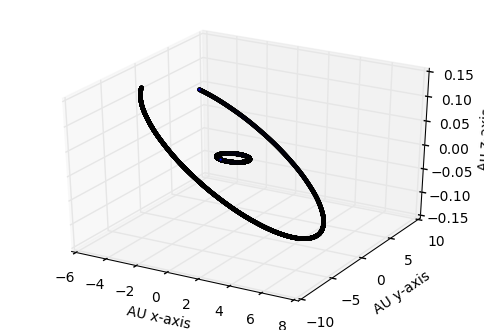

In [49]:
plotter(twoplanet(15, earth, jupiter)[0],twoplanet(15, earth, jupiter)[1],twoplanet(15, earth, jupiter)[2])

The above shows the interactions between the Earth and Jupiter with the sun including interactions between the two planets. The code to make this happen is a mess though, and a much cleaner method is needed for future work with more planets. The next step is to make a class or a more defined function that does this work for me.

In [17]:
#Adding the rest of the planets to the solar system
mercury = makeplanet("Mercury",1.65E-07,2.80E-01,1.73E-01,-1.18E-02,-2.01E-02,2.53E-02,3.91E-03)
venus = makeplanet("Venus", 2.45E-06, -7.02E-02, 1.36E-01, 4.24E-02, -3.81E-03, -1.99E-02, -5.40E-05)
mars = makeplanet("Mars", 3.3E-07, 7.78E-01, 1.28, 7.56E-03, -1.14E-02, 8.47E-03, 4.58E-04)
saturn = makeplanet("Saturn", 0.000275, -1.48,-9.93, 2.32E-01, 5.212E-03, -8.39E-04, -1.93E-04)
uranus = makeplanet("Uranus", 0.000044, 1.82E01, 8.08, -2.06E-01, -1.62E-03, 3.41E-03, 3.38E-05)
neptune = makeplanet("Neptune", 0.0000515, 2.84E01, -9.47, -4.60E-01,9.711E-04, 2.997E-03, -8.38E-05)
pluto = makeplanet("Pluto", 6.55E-09, 9.89, -3.18E01, 5.396E-01, 3.06E-03, 2.906E-04, -9.09E-04)

In [15]:
planets = [mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto]

In [28]:
for i in planets:
    print(i.name)

Mercury
Venus
Earth
Mars
Jupiter
Saturn
Uranus
Neptune
Pluto


The list planets holds really no value to me, but it may come in useful. I was also just looking to make sure that we could reference useful information within the list like getting the names of the planets from each element. I have some idea for looping through the one planet solver, but we will see how this goes.

In [32]:
def computerdoitforme(t, planet1, planet2, planet3, planet4, planet5, planet6, planet7, planet8, planet9):
#These are the verlate equations for making the position value update
    def coorx(xi, h,vxi, axi):
        return xi + h*vxi+h**2*axi/2
    def coory(yi, h,vyi, ayi):
        return yi + h*vyi+h**2*ayi/2
    def coorz(zi, h,vzi, azi):
        return zi + h*vzi+h**2*azi/2
#These are the verlate equations for updating velocity of the planet
    def velx(vxi, h, ax_i_1,ax_i):
        return vxi + (h/2)*(ax_i_1+ax_i)
    def vely(vyi, h, ay_i_1,ay_i):
        return vyi + (h/2)*(ay_i_1+ay_i)
    def velz(vzi, h, az_i_1,az_i):
        return vzi + (h/2)*(az_i_1+az_i)
#These are the acceleration equation when we include all of the planets and the separations of the planet with the 8 others
    def accx(mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, coor1,coor2, coor3, coor4, coor5, coor6, coor7, coor8, coor9,  dist, sepdist1, sepdist2, sepdist3, sepdist4, sepdist5, sepdist6, sepdist7, sepdist8):
          return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass1/(sepdist1**3)-4*math.pi**2*(coor1-coor3)*mass2/(sepdist2**3)-4*math.pi**2*(coor1-coor4)*mass3/(sepdist3**3)-4*math.pi**2*(coor1-coor5)*mass4/(sepdist4**3)-4*math.pi**2*(coor1-coor6)*mass5/(sepdist5**3)-4*math.pi**2*(coor1-coor7)*mass6/(sepdist6**3)-4*math.pi**2*(coor1-coor8)*mass7/(sepdist7**3)-4*math.pi**2*(coor1-coor9)*mass8/(sepdist8**3)
    def accy(mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, coor1,coor2, coor3, coor4, coor5, coor6, coor7, coor8, coor9,  dist, sepdist1, sepdist2, sepdist3, sepdist4, sepdist5, sepdist6, sepdist7, sepdist8):
          return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass1/(sepdist1**3)-4*math.pi**2*(coor1-coor3)*mass2/(sepdist2**3)-4*math.pi**2*(coor1-coor4)*mass3/(sepdist3**3)-4*math.pi**2*(coor1-coor5)*mass4/(sepdist4**3)-4*math.pi**2*(coor1-coor6)*mass5/(sepdist5**3)-4*math.pi**2*(coor1-coor7)*mass6/(sepdist6**3)-4*math.pi**2*(coor1-coor8)*mass7/(sepdist7**3)-4*math.pi**2*(coor1-coor9)*mass8/(sepdist8**3)
    def accz(mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, coor1,coor2, coor3, coor4, coor5, coor6, coor7, coor8, coor9,  dist, sepdist1, sepdist2, sepdist3, sepdist4, sepdist5, sepdist6, sepdist7, sepdist8):
          return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass1/(sepdist1**3)-4*math.pi**2*(coor1-coor3)*mass2/(sepdist2**3)-4*math.pi**2*(coor1-coor4)*mass3/(sepdist3**3)-4*math.pi**2*(coor1-coor5)*mass4/(sepdist4**3)-4*math.pi**2*(coor1-coor6)*mass5/(sepdist5**3)-4*math.pi**2*(coor1-coor7)*mass6/(sepdist6**3)-4*math.pi**2*(coor1-coor8)*mass7/(sepdist7**3)-4*math.pi**2*(coor1-coor9)*mass8/(sepdist8**3)

#This defines the number of years, integration points, and step size
    time = t #The number of years we want to loop over
    h = 1/365 #The step size, defined as one day
    n = int(t/h) #The total numbers of iterations

    #This sets up the zero vectors for all of the quantities that will update over time
    coordinatesx1 = np.zeros(n+1)
    coordinatesy1 = np.zeros(n+1)
    coordinatesz1 = np.zeros(n+1)
    velocitiesx1 = np.zeros(n+1)
    velocitiesy1 = np.zeros(n+1)
    velocitiesz1 = np.zeros(n+1)

    coordinatesx2 = np.zeros(n+1)
    coordinatesy2 = np.zeros(n+1)
    coordinatesz2 = np.zeros(n+1)
    velocitiesx2 = np.zeros(n+1)
    velocitiesy2 = np.zeros(n+1)
    velocitiesz2 = np.zeros(n+1)

    coordinatesx3 = np.zeros(n+1)
    coordinatesy3 = np.zeros(n+1)
    coordinatesz3 = np.zeros(n+1)
    velocitiesx3 = np.zeros(n+1)
    velocitiesy3 = np.zeros(n+1)
    velocitiesz3 = np.zeros(n+1)

    coordinatesx4 = np.zeros(n+1)
    coordinatesy4 = np.zeros(n+1)
    coordinatesz4 = np.zeros(n+1)
    velocitiesx4 = np.zeros(n+1)
    velocitiesy4 = np.zeros(n+1)
    velocitiesz4 = np.zeros(n+1)

    coordinatesx5 = np.zeros(n+1)
    coordinatesy5 = np.zeros(n+1)
    coordinatesz5 = np.zeros(n+1)
    velocitiesx5 = np.zeros(n+1)
    velocitiesy5 = np.zeros(n+1)
    velocitiesz5 = np.zeros(n+1)

    coordinatesx6 = np.zeros(n+1)
    coordinatesy6 = np.zeros(n+1)
    coordinatesz6 = np.zeros(n+1)
    velocitiesx6 = np.zeros(n+1)
    velocitiesy6 = np.zeros(n+1)
    velocitiesz6 = np.zeros(n+1)

    coordinatesx7 = np.zeros(n+1)
    coordinatesy7 = np.zeros(n+1)
    coordinatesz7 = np.zeros(n+1)
    velocitiesx7 = np.zeros(n+1)
    velocitiesy7 = np.zeros(n+1)
    velocitiesz7 = np.zeros(n+1)

    coordinatesx8 = np.zeros(n+1)
    coordinatesy8 = np.zeros(n+1)
    coordinatesz8 = np.zeros(n+1)
    velocitiesx8 = np.zeros(n+1)
    velocitiesy8 = np.zeros(n+1)
    velocitiesz8 = np.zeros(n+1)

    coordinatesx9 = np.zeros(n+1)
    coordinatesy9 = np.zeros(n+1)
    coordinatesz9 = np.zeros(n+1)
    velocitiesx9 = np.zeros(n+1)
    velocitiesy9 = np.zeros(n+1)
    velocitiesz9 = np.zeros(n+1)


    #Set up initial values for the positions and the velocities
    coordinatesx1[0] = planet1.x
    coordinatesy1[0] = planet1.y
    coordinatesz1[0] = planet1.z
    velocitiesx1[0] = planet1.vx
    velocitiesy1[0] = planet1.vy
    velocitiesz1[0] = planet1.vz

    coordinatesx2[0] = planet2.x
    coordinatesy2[0] = planet2.y
    coordinatesz2[0] = planet2.z
    velocitiesx2[0] = planet2.vx
    velocitiesy2[0] = planet2.vy
    velocitiesz2[0] = planet2.vz

    coordinatesx3[0] = planet3.x
    coordinatesy3[0] = planet3.y
    coordinatesz3[0] = planet3.z
    velocitiesx3[0] = planet3.vx
    velocitiesy3[0] = planet3.vy
    velocitiesz3[0] = planet3.vz

    coordinatesx4[0] = planet4.x
    coordinatesy4[0] = planet4.y
    coordinatesz4[0] = planet4.z
    velocitiesx4[0] = planet4.vx
    velocitiesy4[0] = planet4.vy
    velocitiesz4[0] = planet4.vz

    coordinatesx5[0] = planet5.x
    coordinatesy5[0] = planet5.y
    coordinatesz5[0] = planet5.z
    velocitiesx5[0] = planet5.vx
    velocitiesy5[0] = planet5.vy
    velocitiesz5[0] = planet5.vz

    coordinatesx6[0] = planet6.x
    coordinatesy6[0] = planet6.y
    coordinatesz6[0] = planet6.z
    velocitiesx6[0] = planet6.vx
    velocitiesy6[0] = planet6.vy
    velocitiesz6[0] = planet6.vz

    coordinatesx7[0] = planet7.x
    coordinatesy7[0] = planet7.y
    coordinatesz7[0] = planet7.z
    velocitiesx7[0] = planet7.vx
    velocitiesy7[0] = planet7.vy
    velocitiesz7[0] = planet7.vz

    coordinatesx8[0] = planet8.x
    coordinatesy8[0] = planet8.y
    coordinatesz8[0] = planet8.z
    velocitiesx8[0] = planet8.vx
    velocitiesy8[0] = planet8.vy
    velocitiesz8[0] = planet8.vz

    coordinatesx9[0] = planet9.x
    coordinatesy9[0] = planet9.y
    coordinatesz9[0] = planet9.z
    velocitiesx9[0] = planet9.vx
    velocitiesy9[0] = planet9.vy
    velocitiesz9[0] = planet9.vz

#Setting up the radii for the planets defined by an earlier defined function as well as the initial values I programmed in in the beginning
    rad1 = r(planet1)
    rad2 = r(planet2)
    rad3 = r(planet3)
    rad4 = r(planet4)
    rad5 = r(planet5)
    rad6 = r(planet6)
    rad7 = r(planet7)
    rad8 = r(planet8)
    rad9 = r(planet9)

#This does the stuff. All of the stuff.
    for i in range(n):
        #Define x coordinates and velocities for all 9 planets
        x1_i = coordinatesx1[i]
        x2_i = coordinatesx2[i]
        x3_i = coordinatesx3[i]
        x4_i = coordinatesx4[i]
        x5_i = coordinatesx5[i]
        x6_i = coordinatesx6[i]
        x7_i = coordinatesx7[i]
        x8_i = coordinatesx8[i]
        x9_i = coordinatesx9[i]

        vx1_i = velocitiesx1[i]
        vx2_i = velocitiesx2[i]
        vx3_i = velocitiesx3[i]
        vx4_i = velocitiesx4[i]
        vx5_i = velocitiesx5[i]
        vx6_i = velocitiesx6[i]
        vx7_i = velocitiesx7[i]
        vx8_i = velocitiesx8[i]
        vx9_i = velocitiesx9[i]

        #Define y coordinates and velocities for all 9 planets
        y1_i = coordinatesy1[i]
        y2_i = coordinatesy2[i]
        y3_i = coordinatesy3[i]
        y4_i = coordinatesy4[i]
        y5_i = coordinatesy5[i]
        y6_i = coordinatesy6[i]
        y7_i = coordinatesy7[i]
        y8_i = coordinatesy8[i]
        y9_i = coordinatesy9[i]

        vy1_i = velocitiesy1[i]
        vy2_i = velocitiesy2[i]
        vy3_i = velocitiesy3[i]
        vy4_i = velocitiesy4[i]
        vy5_i = velocitiesy5[i]
        vy6_i = velocitiesy6[i]
        vy7_i = velocitiesy7[i]
        vy8_i = velocitiesy8[i]
        vy9_i = velocitiesy9[i]

        #Define z coordinates and velocities for all 9 planets
        z1_i = coordinatesz1[i]
        z2_i = coordinatesz2[i]
        z3_i = coordinatesz3[i]
        z4_i = coordinatesz4[i]
        z5_i = coordinatesz5[i]
        z6_i = coordinatesz6[i]
        z7_i = coordinatesz7[i]
        z8_i = coordinatesz8[i]
        z9_i = coordinatesz9[i]

        vz1_i = velocitiesz1[i]
        vz2_i = velocitiesz2[i]
        vz3_i = velocitiesz3[i]
        vz4_i = velocitiesz4[i]
        vz5_i = velocitiesz5[i]
        vz6_i = velocitiesz6[i]
        vz7_i = velocitiesz7[i]
        vz8_i = velocitiesz8[i]
        vz9_i = velocitiesz9[i]

        #Distance between the planets
        #planet1 to something else radii
        rsep12 = ((x1_i-x2_i)**2+(y1_i-y2_i)**2+(z1_i-z2_i)**2)**(1/2)
        rsep13 = ((x1_i-x3_i)**2+(y1_i-y3_i)**2+(z1_i-z3_i)**2)**(1/2)
        rsep14 = ((x1_i-x4_i)**2+(y1_i-y4_i)**2+(z1_i-z4_i)**2)**(1/2)
        rsep15 = ((x1_i-x5_i)**2+(y1_i-y5_i)**2+(z1_i-z5_i)**2)**(1/2)
        rsep16 = ((x1_i-x6_i)**2+(y1_i-y6_i)**2+(z1_i-z6_i)**2)**(1/2)
        rsep17 = ((x1_i-x7_i)**2+(y1_i-y7_i)**2+(z1_i-z7_i)**2)**(1/2)
        rsep18 = ((x1_i-x8_i)**2+(y1_i-y8_i)**2+(z1_i-z8_i)**2)**(1/2)
        rsep19 = ((x1_i-x9_i)**2+(y1_i-y9_i)**2+(z1_i-z9_i)**2)**(1/2)

        #planet2 to something else radii
        rsep21 = ((x2_i-x1_i)**2+(y2_i-y1_i)**2+(z2_i-z1_i)**2)**(1/2)
        rsep23 = ((x2_i-x3_i)**2+(y2_i-y3_i)**2+(z2_i-z3_i)**2)**(1/2)
        rsep24 = ((x2_i-x4_i)**2+(y2_i-y4_i)**2+(z2_i-z4_i)**2)**(1/2)
        rsep25 = ((x2_i-x5_i)**2+(y2_i-y5_i)**2+(z2_i-z5_i)**2)**(1/2)
        rsep26 = ((x2_i-x6_i)**2+(y2_i-y6_i)**2+(z2_i-z6_i)**2)**(1/2)
        rsep27 = ((x2_i-x7_i)**2+(y2_i-y7_i)**2+(z2_i-z7_i)**2)**(1/2)
        rsep28 = ((x2_i-x8_i)**2+(y2_i-y8_i)**2+(z2_i-z8_i)**2)**(1/2)
        rsep29 = ((x2_i-x9_i)**2+(y2_i-y9_i)**2+(z2_i-z9_i)**2)**(1/2)

        #planet3 to something else radii
        rsep31 = ((x3_i-x1_i)**2+(y3_i-y1_i)**2+(z3_i-z1_i)**2)**(1/2)
        rsep32 = ((x3_i-x2_i)**2+(y3_i-y2_i)**2+(z3_i-z2_i)**2)**(1/2)
        rsep34 = ((x3_i-x4_i)**2+(y3_i-y4_i)**2+(z3_i-z4_i)**2)**(1/2)
        rsep35 = ((x3_i-x5_i)**2+(y3_i-y5_i)**2+(z3_i-z5_i)**2)**(1/2)
        rsep36 = ((x3_i-x6_i)**2+(y3_i-y6_i)**2+(z3_i-z6_i)**2)**(1/2)
        rsep37 = ((x3_i-x7_i)**2+(y3_i-y7_i)**2+(z3_i-z7_i)**2)**(1/2)
        rsep38 = ((x3_i-x8_i)**2+(y3_i-y8_i)**2+(z3_i-z8_i)**2)**(1/2)
        rsep39 = ((x3_i-x9_i)**2+(y3_i-y9_i)**2+(z3_i-z9_i)**2)**(1/2)

        #planet4 to something else radii
        rsep41 = ((x4_i-x1_i)**2+(y4_i-y1_i)**2+(z4_i-z1_i)**2)**(1/2)
        rsep42 = ((x4_i-x2_i)**2+(y4_i-y2_i)**2+(z4_i-z2_i)**2)**(1/2)
        rsep43 = ((x4_i-x3_i)**2+(y4_i-y3_i)**2+(z4_i-z3_i)**2)**(1/2)
        rsep45 = ((x4_i-x5_i)**2+(y4_i-y5_i)**2+(z4_i-z5_i)**2)**(1/2)
        rsep46 = ((x4_i-x6_i)**2+(y4_i-y6_i)**2+(z4_i-z6_i)**2)**(1/2)
        rsep47 = ((x4_i-x7_i)**2+(y4_i-y7_i)**2+(z4_i-z7_i)**2)**(1/2)
        rsep48 = ((x4_i-x8_i)**2+(y4_i-y8_i)**2+(z4_i-z8_i)**2)**(1/2)
        rsep49 = ((x4_i-x9_i)**2+(y4_i-y9_i)**2+(z4_i-z9_i)**2)**(1/2)

        #planet5 to something else radii
        rsep51 = ((x5_i-x1_i)**2+(y5_i-y1_i)**2+(z5_i-z1_i)**2)**(1/2)
        rsep52 = ((x5_i-x2_i)**2+(y5_i-y2_i)**2+(z5_i-z2_i)**2)**(1/2)
        rsep53 = ((x5_i-x3_i)**2+(y5_i-y3_i)**2+(z5_i-z3_i)**2)**(1/2)
        rsep54 = ((x5_i-x4_i)**2+(y5_i-y4_i)**2+(z5_i-z4_i)**2)**(1/2)
        rsep56 = ((x5_i-x6_i)**2+(y5_i-y6_i)**2+(z5_i-z6_i)**2)**(1/2)
        rsep57 = ((x5_i-x7_i)**2+(y5_i-y7_i)**2+(z5_i-z7_i)**2)**(1/2)
        rsep58 = ((x5_i-x8_i)**2+(y5_i-y8_i)**2+(z5_i-z8_i)**2)**(1/2)
        rsep59 = ((x5_i-x9_i)**2+(y5_i-y9_i)**2+(z5_i-z9_i)**2)**(1/2)

        #planet6 to something else radii
        rsep61 = ((x6_i-x1_i)**2+(y6_i-y1_i)**2+(z6_i-z1_i)**2)**(1/2)
        rsep62 = ((x6_i-x2_i)**2+(y6_i-y2_i)**2+(z6_i-z2_i)**2)**(1/2)
        rsep63 = ((x6_i-x3_i)**2+(y6_i-y3_i)**2+(z6_i-z3_i)**2)**(1/2)
        rsep64 = ((x6_i-x4_i)**2+(y6_i-y4_i)**2+(z6_i-z4_i)**2)**(1/2)
        rsep65 = ((x6_i-x5_i)**2+(y6_i-y5_i)**2+(z6_i-z5_i)**2)**(1/2)
        rsep67 = ((x6_i-x7_i)**2+(y6_i-y7_i)**2+(z6_i-z7_i)**2)**(1/2)
        rsep68 = ((x6_i-x8_i)**2+(y6_i-y8_i)**2+(z6_i-z8_i)**2)**(1/2)
        rsep69 = ((x6_i-x9_i)**2+(y6_i-y9_i)**2+(z6_i-z9_i)**2)**(1/2)

        #planet7 to something else radii
        rsep71 = ((x7_i-x1_i)**2+(y7_i-y1_i)**2+(z7_i-z1_i)**2)**(1/2)
        rsep72 = ((x7_i-x2_i)**2+(y7_i-y2_i)**2+(z7_i-z2_i)**2)**(1/2)
        rsep73 = ((x7_i-x3_i)**2+(y7_i-y3_i)**2+(z7_i-z3_i)**2)**(1/2)
        rsep74 = ((x7_i-x4_i)**2+(y7_i-y4_i)**2+(z7_i-z4_i)**2)**(1/2)
        rsep75 = ((x7_i-x5_i)**2+(y7_i-y5_i)**2+(z7_i-z5_i)**2)**(1/2)
        rsep76 = ((x7_i-x6_i)**2+(y7_i-y6_i)**2+(z7_i-z6_i)**2)**(1/2)
        rsep78 = ((x7_i-x8_i)**2+(y7_i-y8_i)**2+(z7_i-z8_i)**2)**(1/2)
        rsep79 = ((x7_i-x9_i)**2+(y7_i-y9_i)**2+(z7_i-z9_i)**2)**(1/2)

        #planet8 to something else radii
        rsep81 = ((x8_i-x1_i)**2+(y8_i-y1_i)**2+(z8_i-z1_i)**2)**(1/2)
        rsep82 = ((x8_i-x2_i)**2+(y8_i-y2_i)**2+(z8_i-z2_i)**2)**(1/2)
        rsep83 = ((x8_i-x3_i)**2+(y8_i-y3_i)**2+(z8_i-z3_i)**2)**(1/2)
        rsep84 = ((x8_i-x4_i)**2+(y8_i-y4_i)**2+(z8_i-z4_i)**2)**(1/2)
        rsep85 = ((x8_i-x5_i)**2+(y8_i-y5_i)**2+(z8_i-z5_i)**2)**(1/2)
        rsep86 = ((x8_i-x6_i)**2+(y8_i-y6_i)**2+(z8_i-z6_i)**2)**(1/2)
        rsep87 = ((x8_i-x7_i)**2+(y8_i-y7_i)**2+(z8_i-z7_i)**2)**(1/2)
        rsep89 = ((x8_i-x9_i)**2+(y8_i-y9_i)**2+(z8_i-z9_i)**2)**(1/2)

        #planet9 to something else radii
        rsep91 = ((x9_i-x1_i)**2+(y9_i-y1_i)**2+(z9_i-z1_i)**2)**(1/2)
        rsep92 = ((x9_i-x2_i)**2+(y9_i-y2_i)**2+(z9_i-z2_i)**2)**(1/2)
        rsep93 = ((x9_i-x3_i)**2+(y9_i-y3_i)**2+(z9_i-z3_i)**2)**(1/2)
        rsep94 = ((x9_i-x4_i)**2+(y9_i-y4_i)**2+(z9_i-z4_i)**2)**(1/2)
        rsep95 = ((x9_i-x5_i)**2+(y9_i-y5_i)**2+(z9_i-z5_i)**2)**(1/2)
        rsep96 = ((x9_i-x6_i)**2+(y9_i-y6_i)**2+(z9_i-z6_i)**2)**(1/2)
        rsep97 = ((x9_i-x7_i)**2+(y9_i-y7_i)**2+(z9_i-z7_i)**2)**(1/2)
        rsep98 = ((x9_i-x8_i)**2+(y9_i-y8_i)**2+(z9_i-z8_i)**2)**(1/2)

        #x accelerations including interactions from the other planets
        ax1_i = accx(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ax2_i = accx(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x2_i, x1_i, x3_i, x4_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad2, rsep21, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ax3_i = accx(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x3_i, x1_i, x2_i, x4_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad3, rsep31, rsep32, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ax4_i = accx(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x4_i, x1_i, x2_i, x3_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad4, rsep41, rsep42, rsep43, rsep45, rsep46, rsep47, rsep48, rsep49)
        ax5_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x5_i, x1_i, x2_i, x3_i, x4_i, x6_i, x7_i, x8_i, x9_i, rad5, rsep51, rsep52, rsep53, rsep54, rsep56, rsep57, rsep58, rsep59)
        ax6_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, x6_i, x1_i, x2_i, x3_i, x4_i, x5_i, x7_i, x8_i, x9_i, rad6, rsep61, rsep62, rsep63, rsep64, rsep65, rsep67, rsep68, rsep69)
        ax7_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, x7_i, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x8_i, x9_i, rad7, rsep71, rsep72, rsep73, rsep74, rsep75, rsep76, rsep78, rsep79)
        ax8_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, x8_i, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x7_i, x9_i, rad8, rsep81, rsep82, rsep83, rsep84, rsep85, rsep86, rsep87, rsep89)
        ax9_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, x9_i, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x7_i, x8_i, rad9, rsep91, rsep92, rsep93, rsep94, rsep95, rsep96, rsep97, rsep98)

        #y accelerations including interactions from the other planets
        ay1_i = accy(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ay2_i = accy(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y2_i, y1_i, y3_i, y4_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad2, rsep21, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ay3_i = accy(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y3_i, y1_i, y2_i, y4_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad3, rsep31, rsep32, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ay4_i = accy(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y4_i, y1_i, y2_i, y3_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad4, rsep41, rsep42, rsep43, rsep45, rsep46, rsep47, rsep48, rsep49)
        ay5_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y5_i, y1_i, y2_i, y3_i, y4_i, y6_i, y7_i, y8_i, y9_i, rad5, rsep51, rsep52, rsep53, rsep54, rsep56, rsep57, rsep58, rsep59)
        ay6_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, y6_i, y1_i, y2_i, y3_i, y4_i, y5_i, y7_i, y8_i, y9_i, rad6, rsep61, rsep62, rsep63, rsep64, rsep65, rsep67, rsep68, rsep69)
        ay7_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, y7_i, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y8_i, y9_i, rad7, rsep71, rsep72, rsep73, rsep74, rsep75, rsep76, rsep78, rsep79)
        ay8_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, y8_i, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y7_i, y9_i, rad8, rsep81, rsep82, rsep83, rsep84, rsep85, rsep86, rsep87, rsep89)
        ay9_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, y9_i, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y7_i, y8_i, rad9, rsep91, rsep92, rsep93, rsep94, rsep95, rsep96, rsep97, rsep98)

        #z accelerations including interactions from the other planets
        az1_i = accz(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        az2_i = accz(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z2_i, z1_i, z3_i, z4_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad2, rsep21, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        az3_i = accz(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z3_i, z1_i, z2_i, z4_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad3, rsep31, rsep32, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        az4_i = accz(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z4_i, z1_i, z2_i, z3_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad4, rsep41, rsep42, rsep43, rsep45, rsep46, rsep47, rsep48, rsep49)
        az5_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z5_i, z1_i, z2_i, z3_i, z4_i, z6_i, z7_i, z8_i, z9_i, rad5, rsep51, rsep52, rsep53, rsep54, rsep56, rsep57, rsep58, rsep59)
        az6_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, z6_i, z1_i, z2_i, z3_i, z4_i, z5_i, z7_i, z8_i, z9_i, rad6, rsep61, rsep62, rsep63, rsep64, rsep65, rsep67, rsep68, rsep69)
        az7_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, z7_i, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z8_i, z9_i, rad7, rsep71, rsep72, rsep73, rsep74, rsep75, rsep76, rsep78, rsep79)
        az8_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, z8_i, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z7_i, z9_i, rad8, rsep81, rsep82, rsep83, rsep84, rsep85, rsep86, rsep87, rsep89)
        az9_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, z9_i, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z7_i, z8_i, rad9, rsep91, rsep92, rsep93, rsep94, rsep95, rsep96, rsep97, rsep98)

        #next x coordinate in the series
        x1_i_1 = coorx(x1_i, h,vx1_i,ax1_i)
        x2_i_1 = coorx(x2_i, h,vx2_i,ax2_i)
        x3_i_1 = coorx(x3_i, h,vx3_i,ax3_i)
        x4_i_1 = coorx(x4_i, h,vx4_i,ax4_i)
        x5_i_1 = coorx(x5_i, h,vx5_i,ax5_i)
        x6_i_1 = coorx(x6_i, h,vx6_i,ax6_i)
        x7_i_1 = coorx(x7_i, h,vx7_i,ax7_i)
        x8_i_1 = coorx(x8_i, h,vx8_i,ax8_i)
        x9_i_1 = coorx(x9_i, h,vx9_i,ax9_i)
        #next y coordinate in the series
        y1_i_1 = coory(y1_i, h,vy1_i,ay1_i)
        y2_i_1 = coory(y2_i, h,vy2_i,ay2_i)
        y3_i_1 = coory(y3_i, h,vy3_i,ay3_i)
        y4_i_1 = coory(y4_i, h,vy4_i,ay4_i)
        y5_i_1 = coory(y5_i, h,vy5_i,ay5_i)
        y6_i_1 = coory(y6_i, h,vy6_i,ay6_i)
        y7_i_1 = coory(y7_i, h,vy7_i,ay7_i)
        y8_i_1 = coory(y8_i, h,vy8_i,ay8_i)
        y9_i_1 = coory(y9_i, h,vy9_i,ay9_i)
        #next z coordinate in the series
        z1_i_1 = coorz(z1_i, h,vz1_i,az1_i)
        z2_i_1 = coorz(z2_i, h,vz2_i,az2_i)
        z3_i_1 = coorz(z3_i, h,vz3_i,az3_i)
        z4_i_1 = coorz(z4_i, h,vz4_i,az4_i)
        z5_i_1 = coorz(z5_i, h,vz5_i,az5_i)
        z6_i_1 = coorz(z6_i, h,vz6_i,az6_i)
        z7_i_1 = coorz(z7_i, h,vz7_i,az7_i)
        z8_i_1 = coorz(z8_i, h,vz8_i,az8_i)
        z9_i_1 = coorz(z9_i, h,vz9_i,az9_i)

        #updates the lists that I made previously
        coordinatesx1[i+1] = x1_i_1
        coordinatesx2[i+1] = x2_i_1
        coordinatesx3[i+1] = x3_i_1
        coordinatesx4[i+1] = x4_i_1
        coordinatesx5[i+1] = x5_i_1
        coordinatesx6[i+1] = x6_i_1
        coordinatesx7[i+1] = x7_i_1
        coordinatesx8[i+1] = x8_i_1
        coordinatesx9[i+1] = x9_i_1

        coordinatesy1[i+1] = y1_i_1
        coordinatesy2[i+1] = y2_i_1
        coordinatesy3[i+1] = y3_i_1
        coordinatesy4[i+1] = y4_i_1
        coordinatesy5[i+1] = y5_i_1
        coordinatesy6[i+1] = y6_i_1
        coordinatesy7[i+1] = y7_i_1
        coordinatesy8[i+1] = y8_i_1
        coordinatesy9[i+1] = y9_i_1

        coordinatesz1[i+1] = z1_i_1
        coordinatesz2[i+1] = z2_i_1
        coordinatesz3[i+1] = z3_i_1
        coordinatesz4[i+1] = z4_i_1
        coordinatesz5[i+1] = z5_i_1
        coordinatesz6[i+1] = z6_i_1
        coordinatesz7[i+1] = z7_i_1
        coordinatesz8[i+1] = z8_i_1
        coordinatesz9[i+1] = z9_i_1

        #accelaration updates for the next time step
        ax1_i_1 = accx(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ax2_i_1 = accx(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x2_i_1, x1_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad2, rsep12, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ax3_i_1 = accx(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x3_i_1, x1_i_1, x2_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad3, rsep13, rsep23, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ax4_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x4_i_1, x1_i_1, x2_i_1, x3_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad4, rsep14, rsep24, rsep34, rsep45, rsep46, rsep47, rsep48, rsep49)
        ax5_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x5_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad5, rsep15, rsep25, rsep35, rsep45, rsep56, rsep57, rsep58, rsep59)
        ax6_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, x6_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x7_i_1, x8_i_1, x9_i_1, rad6, rsep16, rsep26, rsep36, rsep46, rsep56, rsep67, rsep68, rsep69)
        ax7_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, x7_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x8_i_1, x9_i_1, rad7, rsep17, rsep27, rsep37, rsep47, rsep57, rsep67, rsep78, rsep79)
        ax8_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, x8_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x9_i_1, rad8, rsep18, rsep28, rsep38, rsep48, rsep58, rsep68, rsep78, rsep89)
        ax9_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, x9_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, rad9, rsep19, rsep29, rsep39, rsep49, rsep59, rsep69, rsep79, rsep89)

        ay1_i_1 = accy(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ay2_i_1 = accy(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y2_i_1, y1_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad2, rsep12, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ay3_i_1 = accy(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y3_i_1, y1_i_1, y2_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad3, rsep13, rsep23, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ay4_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y4_i_1, y1_i_1, y2_i_1, y3_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad4, rsep14, rsep24, rsep34, rsep45, rsep46, rsep47, rsep48, rsep49)
        ay5_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y5_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad5, rsep15, rsep25, rsep35, rsep45, rsep56, rsep57, rsep58, rsep59)
        ay6_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, y6_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y7_i_1, y8_i_1, y9_i_1, rad6, rsep16, rsep26, rsep36, rsep46, rsep56, rsep67, rsep68, rsep69)
        ay7_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, y7_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y8_i_1, y9_i_1, rad7, rsep17, rsep27, rsep37, rsep47, rsep57, rsep67, rsep78, rsep79)
        ay8_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, y8_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y9_i_1, rad8, rsep18, rsep28, rsep38, rsep48, rsep58, rsep68, rsep78, rsep89)
        ay9_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, y9_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, rad9, rsep19, rsep29, rsep39, rsep49, rsep59, rsep69, rsep79, rsep89)

        az1_i_1 = accz(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        az2_i_1 = accz(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z2_i_1, z1_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad2, rsep12, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        az3_i_1 = accz(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z3_i_1, z1_i_1, z2_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad3, rsep13, rsep23, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        az4_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z4_i_1, z1_i_1, z2_i_1, z3_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad4, rsep14, rsep24, rsep34, rsep45, rsep46, rsep47, rsep48, rsep49)
        az5_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z5_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad5, rsep15, rsep25, rsep35, rsep45, rsep56, rsep57, rsep58, rsep59)
        az6_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, z6_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z7_i_1, z8_i_1, z9_i_1, rad6, rsep16, rsep26, rsep36, rsep46, rsep56, rsep67, rsep68, rsep69)
        az7_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, z7_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z8_i_1, z9_i_1, rad7, rsep17, rsep27, rsep37, rsep47, rsep57, rsep67, rsep78, rsep79)
        az8_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, z8_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z9_i_1, rad8, rsep18, rsep28, rsep38, rsep48, rsep58, rsep68, rsep78, rsep89)
        az9_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, z9_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, rad9, rsep19, rsep29, rsep39, rsep49, rsep59, rsep69, rsep79, rsep89)

        #update velocities for the next time step
        vx1_i_1 = velx(vx1_i,h,ax1_i_1,ax1_i)
        vx2_i_1 = velx(vx2_i,h,ax2_i_1,ax2_i)
        vx3_i_1 = velx(vx3_i,h,ax3_i_1,ax3_i)
        vx4_i_1 = velx(vx4_i,h,ax4_i_1,ax4_i)
        vx5_i_1 = velx(vx5_i,h,ax5_i_1,ax5_i)
        vx6_i_1 = velx(vx6_i,h,ax6_i_1,ax6_i)
        vx7_i_1 = velx(vx7_i,h,ax7_i_1,ax7_i)
        vx8_i_1 = velx(vx8_i,h,ax8_i_1,ax8_i)
        vx9_i_1 = velx(vx9_i,h,ax9_i_1,ax9_i)

        vy1_i_1 = vely(vy1_i,h,ay1_i_1,ay1_i)
        vy2_i_1 = vely(vy2_i,h,ay2_i_1,ay2_i)
        vy3_i_1 = vely(vy3_i,h,ay3_i_1,ay3_i)
        vy4_i_1 = vely(vy4_i,h,ay4_i_1,ay4_i)
        vy5_i_1 = vely(vy5_i,h,ay5_i_1,ay5_i)
        vy6_i_1 = vely(vy6_i,h,ay6_i_1,ay6_i)
        vy7_i_1 = vely(vy7_i,h,ay7_i_1,ay7_i)
        vy8_i_1 = vely(vy8_i,h,ay8_i_1,ay8_i)
        vy9_i_1 = vely(vy9_i,h,ay9_i_1,ay9_i)

        vz1_i_1 = velz(vz1_i,h,az1_i_1,az1_i)
        vz2_i_1 = velz(vz2_i,h,az2_i_1,az2_i)
        vz3_i_1 = velz(vz3_i,h,az3_i_1,az3_i)
        vz4_i_1 = velz(vz4_i,h,az4_i_1,az4_i)
        vz5_i_1 = velz(vz5_i,h,az5_i_1,az5_i)
        vz6_i_1 = velz(vz6_i,h,az6_i_1,az6_i)
        vz7_i_1 = velz(vz7_i,h,az7_i_1,az7_i)
        vz8_i_1 = velz(vz8_i,h,az8_i_1,az8_i)
        vz9_i_1 = velz(vz9_i,h,az9_i_1,az9_i)

        #updating the lists made earlier
        velocitiesx1[i+1] = vx1_i_1
        velocitiesx2[i+1] = vx2_i_1
        velocitiesx3[i+1] = vx3_i_1
        velocitiesx4[i+1] = vx4_i_1
        velocitiesx5[i+1] = vx5_i_1
        velocitiesx6[i+1] = vx6_i_1
        velocitiesx7[i+1] = vx7_i_1
        velocitiesx8[i+1] = vx8_i_1
        velocitiesx9[i+1] = vx9_i_1

        velocitiesy1[i+1] = vy1_i_1
        velocitiesy2[i+1] = vy2_i_1
        velocitiesy3[i+1] = vy3_i_1
        velocitiesy4[i+1] = vy4_i_1
        velocitiesy5[i+1] = vy5_i_1
        velocitiesy6[i+1] = vy6_i_1
        velocitiesy7[i+1] = vy7_i_1
        velocitiesy8[i+1] = vy8_i_1
        velocitiesy9[i+1] = vy9_i_1

        velocitiesz1[i+1] = vz1_i_1
        velocitiesz2[i+1] = vz2_i_1
        velocitiesz3[i+1] = vz3_i_1
        velocitiesz4[i+1] = vz4_i_1
        velocitiesz5[i+1] = vz5_i_1
        velocitiesz6[i+1] = vz6_i_1
        velocitiesz7[i+1] = vz7_i_1
        velocitiesz8[i+1] = vz8_i_1
        velocitiesz9[i+1] = vz9_i_1

    return (coordinatesx1, coordinatesx2, coordinatesx3, coordinatesx4, coordinatesx5, coordinatesx6, coordinatesx7, coordinatesx8, coordinatesx9), (coordinatesy1, coordinatesy2, coordinatesy3, coordinatesy4, coordinatesy5, coordinatesy6, coordinatesy7, coordinatesy8, coordinatesy9), (coordinatesz1, coordinatesz2, coordinatesz3, coordinatesz4, coordinatesz5, coordinatesz6, coordinatesz7, coordinatesz8, coordinatesz9)


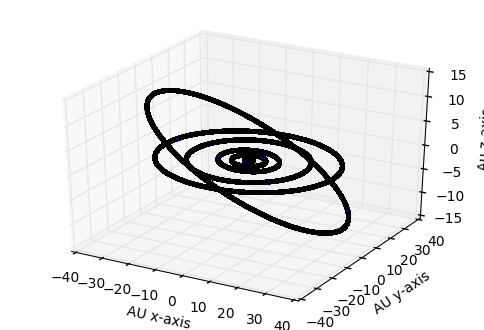

In [33]:
solar_system_x = computerdoitforme(250, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto)[0]
solar_system_y = computerdoitforme(250, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto)[1]
solar_system_z = computerdoitforme(250, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto)[2]
plotter(solar_system_x, solar_system_y, solar_system_z)

IT WORKED!!!!!! SOLAR SYSTEM COMPLETE.
Now to test conservation of energy.

In [66]:
def justone(t, planet1, planet2, planet3, planet4, planet5, planet6, planet7, planet8, planet9):

#These are the verlate equations for making the position value update
    def coorx(xi, h,vxi, axi):
        return xi + h*vxi+h**2*axi/2
    def coory(yi, h,vyi, ayi):
        return yi + h*vyi+h**2*ayi/2
    def coorz(zi, h,vzi, azi):
        return zi + h*vzi+h**2*azi/2
#These are the verlate equations for updating velocity of the planet
    def velx(vxi, h, ax_i_1,ax_i):
        return vxi + (h/2)*(ax_i_1+ax_i)
    def vely(vyi, h, ay_i_1,ay_i):
        return vyi + (h/2)*(ay_i_1+ay_i)
    def velz(vzi, h, az_i_1,az_i):
        return vzi + (h/2)*(az_i_1+az_i)
#These are the acceleration equation when we include all of the planets and the separations of the planet with the 8 others
    def accx(mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, coor1,coor2, coor3, coor4, coor5, coor6, coor7, coor8, coor9,  dist, sepdist1, sepdist2, sepdist3, sepdist4, sepdist5, sepdist6, sepdist7, sepdist8):
          return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass1/(sepdist1**3)-4*math.pi**2*(coor1-coor3)*mass2/(sepdist2**3)-4*math.pi**2*(coor1-coor4)*mass3/(sepdist3**3)-4*math.pi**2*(coor1-coor5)*mass4/(sepdist4**3)-4*math.pi**2*(coor1-coor6)*mass5/(sepdist5**3)-4*math.pi**2*(coor1-coor7)*mass6/(sepdist6**3)-4*math.pi**2*(coor1-coor8)*mass7/(sepdist7**3)-4*math.pi**2*(coor1-coor9)*mass8/(sepdist8**3)
    def accy(mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, coor1,coor2, coor3, coor4, coor5, coor6, coor7, coor8, coor9,  dist, sepdist1, sepdist2, sepdist3, sepdist4, sepdist5, sepdist6, sepdist7, sepdist8):
          return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass1/(sepdist1**3)-4*math.pi**2*(coor1-coor3)*mass2/(sepdist2**3)-4*math.pi**2*(coor1-coor4)*mass3/(sepdist3**3)-4*math.pi**2*(coor1-coor5)*mass4/(sepdist4**3)-4*math.pi**2*(coor1-coor6)*mass5/(sepdist5**3)-4*math.pi**2*(coor1-coor7)*mass6/(sepdist6**3)-4*math.pi**2*(coor1-coor8)*mass7/(sepdist7**3)-4*math.pi**2*(coor1-coor9)*mass8/(sepdist8**3)
    def accz(mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, coor1,coor2, coor3, coor4, coor5, coor6, coor7, coor8, coor9,  dist, sepdist1, sepdist2, sepdist3, sepdist4, sepdist5, sepdist6, sepdist7, sepdist8):
          return -4*math.pi**2*coor1/(dist**3)-4*math.pi**2*(coor1-coor2)*mass1/(sepdist1**3)-4*math.pi**2*(coor1-coor3)*mass2/(sepdist2**3)-4*math.pi**2*(coor1-coor4)*mass3/(sepdist3**3)-4*math.pi**2*(coor1-coor5)*mass4/(sepdist4**3)-4*math.pi**2*(coor1-coor6)*mass5/(sepdist5**3)-4*math.pi**2*(coor1-coor7)*mass6/(sepdist6**3)-4*math.pi**2*(coor1-coor8)*mass7/(sepdist7**3)-4*math.pi**2*(coor1-coor9)*mass8/(sepdist8**3)

#This defines the number of years, integration points, and step size
    time = t #The number of years we want to loop over
    h = 1/365 #The step size, defined as one day
    n = int(t/h) #The total numbers of iterations

    #This sets up the zero vectors for all of the quantities that will update over time
    coordinatesx1 = np.zeros(n+1)
    coordinatesy1 = np.zeros(n+1)
    coordinatesz1 = np.zeros(n+1)
    velocitiesx1 = np.zeros(n+1)
    velocitiesy1 = np.zeros(n+1)
    velocitiesz1 = np.zeros(n+1)

    coordinatesx2 = np.zeros(n+1)
    coordinatesy2 = np.zeros(n+1)
    coordinatesz2 = np.zeros(n+1)
    velocitiesx2 = np.zeros(n+1)
    velocitiesy2 = np.zeros(n+1)
    velocitiesz2 = np.zeros(n+1)

    coordinatesx3 = np.zeros(n+1)
    coordinatesy3 = np.zeros(n+1)
    coordinatesz3 = np.zeros(n+1)
    velocitiesx3 = np.zeros(n+1)
    velocitiesy3 = np.zeros(n+1)
    velocitiesz3 = np.zeros(n+1)

    coordinatesx4 = np.zeros(n+1)
    coordinatesy4 = np.zeros(n+1)
    coordinatesz4 = np.zeros(n+1)
    velocitiesx4 = np.zeros(n+1)
    velocitiesy4 = np.zeros(n+1)
    velocitiesz4 = np.zeros(n+1)

    coordinatesx5 = np.zeros(n+1)
    coordinatesy5 = np.zeros(n+1)
    coordinatesz5 = np.zeros(n+1)
    velocitiesx5 = np.zeros(n+1)
    velocitiesy5 = np.zeros(n+1)
    velocitiesz5 = np.zeros(n+1)

    coordinatesx6 = np.zeros(n+1)
    coordinatesy6 = np.zeros(n+1)
    coordinatesz6 = np.zeros(n+1)
    velocitiesx6 = np.zeros(n+1)
    velocitiesy6 = np.zeros(n+1)
    velocitiesz6 = np.zeros(n+1)

    coordinatesx7 = np.zeros(n+1)
    coordinatesy7 = np.zeros(n+1)
    coordinatesz7 = np.zeros(n+1)
    velocitiesx7 = np.zeros(n+1)
    velocitiesy7 = np.zeros(n+1)
    velocitiesz7 = np.zeros(n+1)

    coordinatesx8 = np.zeros(n+1)
    coordinatesy8 = np.zeros(n+1)
    coordinatesz8 = np.zeros(n+1)
    velocitiesx8 = np.zeros(n+1)
    velocitiesy8 = np.zeros(n+1)
    velocitiesz8 = np.zeros(n+1)

    coordinatesx9 = np.zeros(n+1)
    coordinatesy9 = np.zeros(n+1)
    coordinatesz9 = np.zeros(n+1)
    velocitiesx9 = np.zeros(n+1)
    velocitiesy9 = np.zeros(n+1)
    velocitiesz9 = np.zeros(n+1)


    #Set up initial values for the positions and the velocities
    coordinatesx1[0] = planet1.x
    coordinatesy1[0] = planet1.y
    coordinatesz1[0] = planet1.z
    velocitiesx1[0] = planet1.vx
    velocitiesy1[0] = planet1.vy
    velocitiesz1[0] = planet1.vz

    coordinatesx2[0] = planet2.x
    coordinatesy2[0] = planet2.y
    coordinatesz2[0] = planet2.z
    velocitiesx2[0] = planet2.vx
    velocitiesy2[0] = planet2.vy
    velocitiesz2[0] = planet2.vz

    coordinatesx3[0] = planet3.x
    coordinatesy3[0] = planet3.y
    coordinatesz3[0] = planet3.z
    velocitiesx3[0] = planet3.vx
    velocitiesy3[0] = planet3.vy
    velocitiesz3[0] = planet3.vz

    coordinatesx4[0] = planet4.x
    coordinatesy4[0] = planet4.y
    coordinatesz4[0] = planet4.z
    velocitiesx4[0] = planet4.vx
    velocitiesy4[0] = planet4.vy
    velocitiesz4[0] = planet4.vz

    coordinatesx5[0] = planet5.x
    coordinatesy5[0] = planet5.y
    coordinatesz5[0] = planet5.z
    velocitiesx5[0] = planet5.vx
    velocitiesy5[0] = planet5.vy
    velocitiesz5[0] = planet5.vz

    coordinatesx6[0] = planet6.x
    coordinatesy6[0] = planet6.y
    coordinatesz6[0] = planet6.z
    velocitiesx6[0] = planet6.vx
    velocitiesy6[0] = planet6.vy
    velocitiesz6[0] = planet6.vz

    coordinatesx7[0] = planet7.x
    coordinatesy7[0] = planet7.y
    coordinatesz7[0] = planet7.z
    velocitiesx7[0] = planet7.vx
    velocitiesy7[0] = planet7.vy
    velocitiesz7[0] = planet7.vz

    coordinatesx8[0] = planet8.x
    coordinatesy8[0] = planet8.y
    coordinatesz8[0] = planet8.z
    velocitiesx8[0] = planet8.vx
    velocitiesy8[0] = planet8.vy
    velocitiesz8[0] = planet8.vz

    coordinatesx9[0] = planet9.x
    coordinatesy9[0] = planet9.y
    coordinatesz9[0] = planet9.z
    velocitiesx9[0] = planet9.vx
    velocitiesy9[0] = planet9.vy
    velocitiesz9[0] = planet9.vz

    #Defines the radius of the planet's orbit
    def r(planet):
        return (planet.x**2+ planet.y**2+ planet.z**2)**(0.5)

    #Setting up the radii for the planets defined by an earlier defined function as well as the initial values I programmed in in the beginning
    rad1 = r(planet1)
    rad2 = r(planet2)
    rad3 = r(planet3)
    rad4 = r(planet4)
    rad5 = r(planet5)
    rad6 = r(planet6)
    rad7 = r(planet7)
    rad8 = r(planet8)
    rad9 = r(planet9)

#This does the stuff. All of the stuff.
    for i in range(n):
        #Define x coordinates and velocities for all 9 planets
        x1_i = coordinatesx1[i]
        x2_i = coordinatesx2[i]
        x3_i = coordinatesx3[i]
        x4_i = coordinatesx4[i]
        x5_i = coordinatesx5[i]
        x6_i = coordinatesx6[i]
        x7_i = coordinatesx7[i]
        x8_i = coordinatesx8[i]
        x9_i = coordinatesx9[i]

        vx1_i = velocitiesx1[i]
        vx2_i = velocitiesx2[i]
        vx3_i = velocitiesx3[i]
        vx4_i = velocitiesx4[i]
        vx5_i = velocitiesx5[i]
        vx6_i = velocitiesx6[i]
        vx7_i = velocitiesx7[i]
        vx8_i = velocitiesx8[i]
        vx9_i = velocitiesx9[i]

        #Define y coordinates and velocities for all 9 planets
        y1_i = coordinatesy1[i]
        y2_i = coordinatesy2[i]
        y3_i = coordinatesy3[i]
        y4_i = coordinatesy4[i]
        y5_i = coordinatesy5[i]
        y6_i = coordinatesy6[i]
        y7_i = coordinatesy7[i]
        y8_i = coordinatesy8[i]
        y9_i = coordinatesy9[i]

        vy1_i = velocitiesy1[i]
        vy2_i = velocitiesy2[i]
        vy3_i = velocitiesy3[i]
        vy4_i = velocitiesy4[i]
        vy5_i = velocitiesy5[i]
        vy6_i = velocitiesy6[i]
        vy7_i = velocitiesy7[i]
        vy8_i = velocitiesy8[i]
        vy9_i = velocitiesy9[i]

        #Define z coordinates and velocities for all 9 planets
        z1_i = coordinatesz1[i]
        z2_i = coordinatesz2[i]
        z3_i = coordinatesz3[i]
        z4_i = coordinatesz4[i]
        z5_i = coordinatesz5[i]
        z6_i = coordinatesz6[i]
        z7_i = coordinatesz7[i]
        z8_i = coordinatesz8[i]
        z9_i = coordinatesz9[i]

        vz1_i = velocitiesz1[i]
        vz2_i = velocitiesz2[i]
        vz3_i = velocitiesz3[i]
        vz4_i = velocitiesz4[i]
        vz5_i = velocitiesz5[i]
        vz6_i = velocitiesz6[i]
        vz7_i = velocitiesz7[i]
        vz8_i = velocitiesz8[i]
        vz9_i = velocitiesz9[i]

        #Distance between the planets
        #planet1 to something else radii
        rsep12 = ((x1_i-x2_i)**2+(y1_i-y2_i)**2+(z1_i-z2_i)**2)**(1/2)
        rsep13 = ((x1_i-x3_i)**2+(y1_i-y3_i)**2+(z1_i-z3_i)**2)**(1/2)
        rsep14 = ((x1_i-x4_i)**2+(y1_i-y4_i)**2+(z1_i-z4_i)**2)**(1/2)
        rsep15 = ((x1_i-x5_i)**2+(y1_i-y5_i)**2+(z1_i-z5_i)**2)**(1/2)
        rsep16 = ((x1_i-x6_i)**2+(y1_i-y6_i)**2+(z1_i-z6_i)**2)**(1/2)
        rsep17 = ((x1_i-x7_i)**2+(y1_i-y7_i)**2+(z1_i-z7_i)**2)**(1/2)
        rsep18 = ((x1_i-x8_i)**2+(y1_i-y8_i)**2+(z1_i-z8_i)**2)**(1/2)
        rsep19 = ((x1_i-x9_i)**2+(y1_i-y9_i)**2+(z1_i-z9_i)**2)**(1/2)

        #planet2 to something else radii
        rsep21 = ((x2_i-x1_i)**2+(y2_i-y1_i)**2+(z2_i-z1_i)**2)**(1/2)
        rsep23 = ((x2_i-x3_i)**2+(y2_i-y3_i)**2+(z2_i-z3_i)**2)**(1/2)
        rsep24 = ((x2_i-x4_i)**2+(y2_i-y4_i)**2+(z2_i-z4_i)**2)**(1/2)
        rsep25 = ((x2_i-x5_i)**2+(y2_i-y5_i)**2+(z2_i-z5_i)**2)**(1/2)
        rsep26 = ((x2_i-x6_i)**2+(y2_i-y6_i)**2+(z2_i-z6_i)**2)**(1/2)
        rsep27 = ((x2_i-x7_i)**2+(y2_i-y7_i)**2+(z2_i-z7_i)**2)**(1/2)
        rsep28 = ((x2_i-x8_i)**2+(y2_i-y8_i)**2+(z2_i-z8_i)**2)**(1/2)
        rsep29 = ((x2_i-x9_i)**2+(y2_i-y9_i)**2+(z2_i-z9_i)**2)**(1/2)

        #planet3 to something else radii
        rsep31 = ((x3_i-x1_i)**2+(y3_i-y1_i)**2+(z3_i-z1_i)**2)**(1/2)
        rsep32 = ((x3_i-x2_i)**2+(y3_i-y2_i)**2+(z3_i-z2_i)**2)**(1/2)
        rsep34 = ((x3_i-x4_i)**2+(y3_i-y4_i)**2+(z3_i-z4_i)**2)**(1/2)
        rsep35 = ((x3_i-x5_i)**2+(y3_i-y5_i)**2+(z3_i-z5_i)**2)**(1/2)
        rsep36 = ((x3_i-x6_i)**2+(y3_i-y6_i)**2+(z3_i-z6_i)**2)**(1/2)
        rsep37 = ((x3_i-x7_i)**2+(y3_i-y7_i)**2+(z3_i-z7_i)**2)**(1/2)
        rsep38 = ((x3_i-x8_i)**2+(y3_i-y8_i)**2+(z3_i-z8_i)**2)**(1/2)
        rsep39 = ((x3_i-x9_i)**2+(y3_i-y9_i)**2+(z3_i-z9_i)**2)**(1/2)

        #planet4 to something else radii
        rsep41 = ((x4_i-x1_i)**2+(y4_i-y1_i)**2+(z4_i-z1_i)**2)**(1/2)
        rsep42 = ((x4_i-x2_i)**2+(y4_i-y2_i)**2+(z4_i-z2_i)**2)**(1/2)
        rsep43 = ((x4_i-x3_i)**2+(y4_i-y3_i)**2+(z4_i-z3_i)**2)**(1/2)
        rsep45 = ((x4_i-x5_i)**2+(y4_i-y5_i)**2+(z4_i-z5_i)**2)**(1/2)
        rsep46 = ((x4_i-x6_i)**2+(y4_i-y6_i)**2+(z4_i-z6_i)**2)**(1/2)
        rsep47 = ((x4_i-x7_i)**2+(y4_i-y7_i)**2+(z4_i-z7_i)**2)**(1/2)
        rsep48 = ((x4_i-x8_i)**2+(y4_i-y8_i)**2+(z4_i-z8_i)**2)**(1/2)
        rsep49 = ((x4_i-x9_i)**2+(y4_i-y9_i)**2+(z4_i-z9_i)**2)**(1/2)

        #planet5 to something else radii
        rsep51 = ((x5_i-x1_i)**2+(y5_i-y1_i)**2+(z5_i-z1_i)**2)**(1/2)
        rsep52 = ((x5_i-x2_i)**2+(y5_i-y2_i)**2+(z5_i-z2_i)**2)**(1/2)
        rsep53 = ((x5_i-x3_i)**2+(y5_i-y3_i)**2+(z5_i-z3_i)**2)**(1/2)
        rsep54 = ((x5_i-x4_i)**2+(y5_i-y4_i)**2+(z5_i-z4_i)**2)**(1/2)
        rsep56 = ((x5_i-x6_i)**2+(y5_i-y6_i)**2+(z5_i-z6_i)**2)**(1/2)
        rsep57 = ((x5_i-x7_i)**2+(y5_i-y7_i)**2+(z5_i-z7_i)**2)**(1/2)
        rsep58 = ((x5_i-x8_i)**2+(y5_i-y8_i)**2+(z5_i-z8_i)**2)**(1/2)
        rsep59 = ((x5_i-x9_i)**2+(y5_i-y9_i)**2+(z5_i-z9_i)**2)**(1/2)

        #planet6 to something else radii
        rsep61 = ((x6_i-x1_i)**2+(y6_i-y1_i)**2+(z6_i-z1_i)**2)**(1/2)
        rsep62 = ((x6_i-x2_i)**2+(y6_i-y2_i)**2+(z6_i-z2_i)**2)**(1/2)
        rsep63 = ((x6_i-x3_i)**2+(y6_i-y3_i)**2+(z6_i-z3_i)**2)**(1/2)
        rsep64 = ((x6_i-x4_i)**2+(y6_i-y4_i)**2+(z6_i-z4_i)**2)**(1/2)
        rsep65 = ((x6_i-x5_i)**2+(y6_i-y5_i)**2+(z6_i-z5_i)**2)**(1/2)
        rsep67 = ((x6_i-x7_i)**2+(y6_i-y7_i)**2+(z6_i-z7_i)**2)**(1/2)
        rsep68 = ((x6_i-x8_i)**2+(y6_i-y8_i)**2+(z6_i-z8_i)**2)**(1/2)
        rsep69 = ((x6_i-x9_i)**2+(y6_i-y9_i)**2+(z6_i-z9_i)**2)**(1/2)

        #planet7 to something else radii
        rsep71 = ((x7_i-x1_i)**2+(y7_i-y1_i)**2+(z7_i-z1_i)**2)**(1/2)
        rsep72 = ((x7_i-x2_i)**2+(y7_i-y2_i)**2+(z7_i-z2_i)**2)**(1/2)
        rsep73 = ((x7_i-x3_i)**2+(y7_i-y3_i)**2+(z7_i-z3_i)**2)**(1/2)
        rsep74 = ((x7_i-x4_i)**2+(y7_i-y4_i)**2+(z7_i-z4_i)**2)**(1/2)
        rsep75 = ((x7_i-x5_i)**2+(y7_i-y5_i)**2+(z7_i-z5_i)**2)**(1/2)
        rsep76 = ((x7_i-x6_i)**2+(y7_i-y6_i)**2+(z7_i-z6_i)**2)**(1/2)
        rsep78 = ((x7_i-x8_i)**2+(y7_i-y8_i)**2+(z7_i-z8_i)**2)**(1/2)
        rsep79 = ((x7_i-x9_i)**2+(y7_i-y9_i)**2+(z7_i-z9_i)**2)**(1/2)

        #planet8 to something else radii
        rsep81 = ((x8_i-x1_i)**2+(y8_i-y1_i)**2+(z8_i-z1_i)**2)**(1/2)
        rsep82 = ((x8_i-x2_i)**2+(y8_i-y2_i)**2+(z8_i-z2_i)**2)**(1/2)
        rsep83 = ((x8_i-x3_i)**2+(y8_i-y3_i)**2+(z8_i-z3_i)**2)**(1/2)
        rsep84 = ((x8_i-x4_i)**2+(y8_i-y4_i)**2+(z8_i-z4_i)**2)**(1/2)
        rsep85 = ((x8_i-x5_i)**2+(y8_i-y5_i)**2+(z8_i-z5_i)**2)**(1/2)
        rsep86 = ((x8_i-x6_i)**2+(y8_i-y6_i)**2+(z8_i-z6_i)**2)**(1/2)
        rsep87 = ((x8_i-x7_i)**2+(y8_i-y7_i)**2+(z8_i-z7_i)**2)**(1/2)
        rsep89 = ((x8_i-x9_i)**2+(y8_i-y9_i)**2+(z8_i-z9_i)**2)**(1/2)

        #planet9 to something else radii
        rsep91 = ((x9_i-x1_i)**2+(y9_i-y1_i)**2+(z9_i-z1_i)**2)**(1/2)
        rsep92 = ((x9_i-x2_i)**2+(y9_i-y2_i)**2+(z9_i-z2_i)**2)**(1/2)
        rsep93 = ((x9_i-x3_i)**2+(y9_i-y3_i)**2+(z9_i-z3_i)**2)**(1/2)
        rsep94 = ((x9_i-x4_i)**2+(y9_i-y4_i)**2+(z9_i-z4_i)**2)**(1/2)
        rsep95 = ((x9_i-x5_i)**2+(y9_i-y5_i)**2+(z9_i-z5_i)**2)**(1/2)
        rsep96 = ((x9_i-x6_i)**2+(y9_i-y6_i)**2+(z9_i-z6_i)**2)**(1/2)
        rsep97 = ((x9_i-x7_i)**2+(y9_i-y7_i)**2+(z9_i-z7_i)**2)**(1/2)
        rsep98 = ((x9_i-x8_i)**2+(y9_i-y8_i)**2+(z9_i-z8_i)**2)**(1/2)

        #x accelerations including interactions from the other planets
        ax1_i = accx(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ax2_i = accx(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x2_i, x1_i, x3_i, x4_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad2, rsep21, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ax3_i = accx(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x3_i, x1_i, x2_i, x4_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad3, rsep31, rsep32, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ax4_i = accx(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x4_i, x1_i, x2_i, x3_i, x5_i, x6_i, x7_i, x8_i, x9_i, rad4, rsep41, rsep42, rsep43, rsep45, rsep46, rsep47, rsep48, rsep49)
        ax5_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x5_i, x1_i, x2_i, x3_i, x4_i, x6_i, x7_i, x8_i, x9_i, rad5, rsep51, rsep52, rsep53, rsep54, rsep56, rsep57, rsep58, rsep59)
        ax6_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, x6_i, x1_i, x2_i, x3_i, x4_i, x5_i, x7_i, x8_i, x9_i, rad6, rsep61, rsep62, rsep63, rsep64, rsep65, rsep67, rsep68, rsep69)
        ax7_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, x7_i, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x8_i, x9_i, rad7, rsep71, rsep72, rsep73, rsep74, rsep75, rsep76, rsep78, rsep79)
        ax8_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, x8_i, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x7_i, x9_i, rad8, rsep81, rsep82, rsep83, rsep84, rsep85, rsep86, rsep87, rsep89)
        ax9_i = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, x9_i, x1_i, x2_i, x3_i, x4_i, x5_i, x6_i, x7_i, x8_i, rad9, rsep91, rsep92, rsep93, rsep94, rsep95, rsep96, rsep97, rsep98)

        #y accelerations including interactions from the other planets
        ay1_i = accy(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ay2_i = accy(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y2_i, y1_i, y3_i, y4_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad2, rsep21, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ay3_i = accy(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y3_i, y1_i, y2_i, y4_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad3, rsep31, rsep32, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ay4_i = accy(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y4_i, y1_i, y2_i, y3_i, y5_i, y6_i, y7_i, y8_i, y9_i, rad4, rsep41, rsep42, rsep43, rsep45, rsep46, rsep47, rsep48, rsep49)
        ay5_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y5_i, y1_i, y2_i, y3_i, y4_i, y6_i, y7_i, y8_i, y9_i, rad5, rsep51, rsep52, rsep53, rsep54, rsep56, rsep57, rsep58, rsep59)
        ay6_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, y6_i, y1_i, y2_i, y3_i, y4_i, y5_i, y7_i, y8_i, y9_i, rad6, rsep61, rsep62, rsep63, rsep64, rsep65, rsep67, rsep68, rsep69)
        ay7_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, y7_i, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y8_i, y9_i, rad7, rsep71, rsep72, rsep73, rsep74, rsep75, rsep76, rsep78, rsep79)
        ay8_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, y8_i, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y7_i, y9_i, rad8, rsep81, rsep82, rsep83, rsep84, rsep85, rsep86, rsep87, rsep89)
        ay9_i = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, y9_i, y1_i, y2_i, y3_i, y4_i, y5_i, y6_i, y7_i, y8_i, rad9, rsep91, rsep92, rsep93, rsep94, rsep95, rsep96, rsep97, rsep98)

        #z accelerations including interactions from the other planets
        az1_i = accz(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        az2_i = accz(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z2_i, z1_i, z3_i, z4_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad2, rsep21, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        az3_i = accz(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z3_i, z1_i, z2_i, z4_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad3, rsep31, rsep32, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        az4_i = accz(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z4_i, z1_i, z2_i, z3_i, z5_i, z6_i, z7_i, z8_i, z9_i, rad4, rsep41, rsep42, rsep43, rsep45, rsep46, rsep47, rsep48, rsep49)
        az5_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z5_i, z1_i, z2_i, z3_i, z4_i, z6_i, z7_i, z8_i, z9_i, rad5, rsep51, rsep52, rsep53, rsep54, rsep56, rsep57, rsep58, rsep59)
        az6_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, z6_i, z1_i, z2_i, z3_i, z4_i, z5_i, z7_i, z8_i, z9_i, rad6, rsep61, rsep62, rsep63, rsep64, rsep65, rsep67, rsep68, rsep69)
        az7_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, z7_i, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z8_i, z9_i, rad7, rsep71, rsep72, rsep73, rsep74, rsep75, rsep76, rsep78, rsep79)
        az8_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, z8_i, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z7_i, z9_i, rad8, rsep81, rsep82, rsep83, rsep84, rsep85, rsep86, rsep87, rsep89)
        az9_i = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, z9_i, z1_i, z2_i, z3_i, z4_i, z5_i, z6_i, z7_i, z8_i, rad9, rsep91, rsep92, rsep93, rsep94, rsep95, rsep96, rsep97, rsep98)

        #next x coordinate in the series
        x1_i_1 = coorx(x1_i, h,vx1_i,ax1_i)
        x2_i_1 = coorx(x2_i, h,vx2_i,ax2_i)
        x3_i_1 = coorx(x3_i, h,vx3_i,ax3_i)
        x4_i_1 = coorx(x4_i, h,vx4_i,ax4_i)
        x5_i_1 = coorx(x5_i, h,vx5_i,ax5_i)
        x6_i_1 = coorx(x6_i, h,vx6_i,ax6_i)
        x7_i_1 = coorx(x7_i, h,vx7_i,ax7_i)
        x8_i_1 = coorx(x8_i, h,vx8_i,ax8_i)
        x9_i_1 = coorx(x9_i, h,vx9_i,ax9_i)
        #next y coordinate in the series
        y1_i_1 = coory(y1_i, h,vy1_i,ay1_i)
        y2_i_1 = coory(y2_i, h,vy2_i,ay2_i)
        y3_i_1 = coory(y3_i, h,vy3_i,ay3_i)
        y4_i_1 = coory(y4_i, h,vy4_i,ay4_i)
        y5_i_1 = coory(y5_i, h,vy5_i,ay5_i)
        y6_i_1 = coory(y6_i, h,vy6_i,ay6_i)
        y7_i_1 = coory(y7_i, h,vy7_i,ay7_i)
        y8_i_1 = coory(y8_i, h,vy8_i,ay8_i)
        y9_i_1 = coory(y9_i, h,vy9_i,ay9_i)
        #next z coordinate in the series
        z1_i_1 = coorz(z1_i, h,vz1_i,az1_i)
        z2_i_1 = coorz(z2_i, h,vz2_i,az2_i)
        z3_i_1 = coorz(z3_i, h,vz3_i,az3_i)
        z4_i_1 = coorz(z4_i, h,vz4_i,az4_i)
        z5_i_1 = coorz(z5_i, h,vz5_i,az5_i)
        z6_i_1 = coorz(z6_i, h,vz6_i,az6_i)
        z7_i_1 = coorz(z7_i, h,vz7_i,az7_i)
        z8_i_1 = coorz(z8_i, h,vz8_i,az8_i)
        z9_i_1 = coorz(z9_i, h,vz9_i,az9_i)

        #updates the lists that I made previously
        coordinatesx1[i+1] = x1_i_1
        coordinatesx2[i+1] = x2_i_1
        coordinatesx3[i+1] = x3_i_1
        coordinatesx4[i+1] = x4_i_1
        coordinatesx5[i+1] = x5_i_1
        coordinatesx6[i+1] = x6_i_1
        coordinatesx7[i+1] = x7_i_1
        coordinatesx8[i+1] = x8_i_1
        coordinatesx9[i+1] = x9_i_1

        coordinatesy1[i+1] = y1_i_1
        coordinatesy2[i+1] = y2_i_1
        coordinatesy3[i+1] = y3_i_1
        coordinatesy4[i+1] = y4_i_1
        coordinatesy5[i+1] = y5_i_1
        coordinatesy6[i+1] = y6_i_1
        coordinatesy7[i+1] = y7_i_1
        coordinatesy8[i+1] = y8_i_1
        coordinatesy9[i+1] = y9_i_1

        coordinatesz1[i+1] = z1_i_1
        coordinatesz2[i+1] = z2_i_1
        coordinatesz3[i+1] = z3_i_1
        coordinatesz4[i+1] = z4_i_1
        coordinatesz5[i+1] = z5_i_1
        coordinatesz6[i+1] = z6_i_1
        coordinatesz7[i+1] = z7_i_1
        coordinatesz8[i+1] = z8_i_1
        coordinatesz9[i+1] = z9_i_1

        #accelaration updates for the next time step
        ax1_i_1 = accx(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ax2_i_1 = accx(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x2_i_1, x1_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad2, rsep12, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ax3_i_1 = accx(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x3_i_1, x1_i_1, x2_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad3, rsep13, rsep23, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ax4_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x4_i_1, x1_i_1, x2_i_1, x3_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad4, rsep14, rsep24, rsep34, rsep45, rsep46, rsep47, rsep48, rsep49)
        ax5_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, x5_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x6_i_1, x7_i_1, x8_i_1, x9_i_1, rad5, rsep15, rsep25, rsep35, rsep45, rsep56, rsep57, rsep58, rsep59)
        ax6_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, x6_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x7_i_1, x8_i_1, x9_i_1, rad6, rsep16, rsep26, rsep36, rsep46, rsep56, rsep67, rsep68, rsep69)
        ax7_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, x7_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x8_i_1, x9_i_1, rad7, rsep17, rsep27, rsep37, rsep47, rsep57, rsep67, rsep78, rsep79)
        ax8_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, x8_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x9_i_1, rad8, rsep18, rsep28, rsep38, rsep48, rsep58, rsep68, rsep78, rsep89)
        ax9_i_1 = accx(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, x9_i_1, x1_i_1, x2_i_1, x3_i_1, x4_i_1, x5_i_1, x6_i_1, x7_i_1, x8_i_1, rad9, rsep19, rsep29, rsep39, rsep49, rsep59, rsep69, rsep79, rsep89)

        ay1_i_1 = accy(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        ay2_i_1 = accy(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y2_i_1, y1_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad2, rsep12, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        ay3_i_1 = accy(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y3_i_1, y1_i_1, y2_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad3, rsep13, rsep23, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        ay4_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y4_i_1, y1_i_1, y2_i_1, y3_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad4, rsep14, rsep24, rsep34, rsep45, rsep46, rsep47, rsep48, rsep49)
        ay5_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, y5_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y6_i_1, y7_i_1, y8_i_1, y9_i_1, rad5, rsep15, rsep25, rsep35, rsep45, rsep56, rsep57, rsep58, rsep59)
        ay6_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, y6_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y7_i_1, y8_i_1, y9_i_1, rad6, rsep16, rsep26, rsep36, rsep46, rsep56, rsep67, rsep68, rsep69)
        ay7_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, y7_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y8_i_1, y9_i_1, rad7, rsep17, rsep27, rsep37, rsep47, rsep57, rsep67, rsep78, rsep79)
        ay8_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, y8_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y9_i_1, rad8, rsep18, rsep28, rsep38, rsep48, rsep58, rsep68, rsep78, rsep89)
        ay9_i_1 = accy(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, y9_i_1, y1_i_1, y2_i_1, y3_i_1, y4_i_1, y5_i_1, y6_i_1, y7_i_1, y8_i_1, rad9, rsep19, rsep29, rsep39, rsep49, rsep59, rsep69, rsep79, rsep89)

        az1_i_1 = accz(planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad1, rsep12, rsep13, rsep14, rsep15, rsep16, rsep17, rsep18, rsep19)
        az2_i_1 = accz(planet1.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z2_i_1, z1_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad2, rsep12, rsep23, rsep24, rsep25, rsep26, rsep27, rsep28, rsep29)
        az3_i_1 = accz(planet1.mass, planet2.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z3_i_1, z1_i_1, z2_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad3, rsep13, rsep23, rsep34, rsep35, rsep36, rsep37, rsep38, rsep39)
        az4_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z4_i_1, z1_i_1, z2_i_1, z3_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad4, rsep14, rsep24, rsep34, rsep45, rsep46, rsep47, rsep48, rsep49)
        az5_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet6.mass, planet7.mass, planet8.mass, planet9.mass, z5_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z6_i_1, z7_i_1, z8_i_1, z9_i_1, rad5, rsep15, rsep25, rsep35, rsep45, rsep56, rsep57, rsep58, rsep59)
        az6_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet7.mass, planet8.mass, planet9.mass, z6_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z7_i_1, z8_i_1, z9_i_1, rad6, rsep16, rsep26, rsep36, rsep46, rsep56, rsep67, rsep68, rsep69)
        az7_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet8.mass, planet9.mass, z7_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z8_i_1, z9_i_1, rad7, rsep17, rsep27, rsep37, rsep47, rsep57, rsep67, rsep78, rsep79)
        az8_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet9.mass, z8_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z9_i_1, rad8, rsep18, rsep28, rsep38, rsep48, rsep58, rsep68, rsep78, rsep89)
        az9_i_1 = accz(planet1.mass, planet2.mass, planet3.mass, planet4.mass, planet5.mass, planet6.mass, planet7.mass, planet8.mass, z9_i_1, z1_i_1, z2_i_1, z3_i_1, z4_i_1, z5_i_1, z6_i_1, z7_i_1, z8_i_1, rad9, rsep19, rsep29, rsep39, rsep49, rsep59, rsep69, rsep79, rsep89)

        #update velocities for the next time step
        vx1_i_1 = velx(vx1_i,h,ax1_i_1,ax1_i)
        vx2_i_1 = velx(vx2_i,h,ax2_i_1,ax2_i)
        vx3_i_1 = velx(vx3_i,h,ax3_i_1,ax3_i)
        vx4_i_1 = velx(vx4_i,h,ax4_i_1,ax4_i)
        vx5_i_1 = velx(vx5_i,h,ax5_i_1,ax5_i)
        vx6_i_1 = velx(vx6_i,h,ax6_i_1,ax6_i)
        vx7_i_1 = velx(vx7_i,h,ax7_i_1,ax7_i)
        vx8_i_1 = velx(vx8_i,h,ax8_i_1,ax8_i)
        vx9_i_1 = velx(vx9_i,h,ax9_i_1,ax9_i)

        vy1_i_1 = vely(vy1_i,h,ay1_i_1,ay1_i)
        vy2_i_1 = vely(vy2_i,h,ay2_i_1,ay2_i)
        vy3_i_1 = vely(vy3_i,h,ay3_i_1,ay3_i)
        vy4_i_1 = vely(vy4_i,h,ay4_i_1,ay4_i)
        vy5_i_1 = vely(vy5_i,h,ay5_i_1,ay5_i)
        vy6_i_1 = vely(vy6_i,h,ay6_i_1,ay6_i)
        vy7_i_1 = vely(vy7_i,h,ay7_i_1,ay7_i)
        vy8_i_1 = vely(vy8_i,h,ay8_i_1,ay8_i)
        vy9_i_1 = vely(vy9_i,h,ay9_i_1,ay9_i)

        vz1_i_1 = velz(vz1_i,h,az1_i_1,az1_i)
        vz2_i_1 = velz(vz2_i,h,az2_i_1,az2_i)
        vz3_i_1 = velz(vz3_i,h,az3_i_1,az3_i)
        vz4_i_1 = velz(vz4_i,h,az4_i_1,az4_i)
        vz5_i_1 = velz(vz5_i,h,az5_i_1,az5_i)
        vz6_i_1 = velz(vz6_i,h,az6_i_1,az6_i)
        vz7_i_1 = velz(vz7_i,h,az7_i_1,az7_i)
        vz8_i_1 = velz(vz8_i,h,az8_i_1,az8_i)
        vz9_i_1 = velz(vz9_i,h,az9_i_1,az9_i)

        #updating the lists made earlier
        velocitiesx1[i+1] = vx1_i_1
        velocitiesx2[i+1] = vx2_i_1
        velocitiesx3[i+1] = vx3_i_1
        velocitiesx4[i+1] = vx4_i_1
        velocitiesx5[i+1] = vx5_i_1
        velocitiesx6[i+1] = vx6_i_1
        velocitiesx7[i+1] = vx7_i_1
        velocitiesx8[i+1] = vx8_i_1
        velocitiesx9[i+1] = vx9_i_1

        velocitiesy1[i+1] = vy1_i_1
        velocitiesy2[i+1] = vy2_i_1
        velocitiesy3[i+1] = vy3_i_1
        velocitiesy4[i+1] = vy4_i_1
        velocitiesy5[i+1] = vy5_i_1
        velocitiesy6[i+1] = vy6_i_1
        velocitiesy7[i+1] = vy7_i_1
        velocitiesy8[i+1] = vy8_i_1
        velocitiesy9[i+1] = vy9_i_1

        velocitiesz1[i+1] = vz1_i_1
        velocitiesz2[i+1] = vz2_i_1
        velocitiesz3[i+1] = vz3_i_1
        velocitiesz4[i+1] = vz4_i_1
        velocitiesz5[i+1] = vz5_i_1
        velocitiesz6[i+1] = vz6_i_1
        velocitiesz7[i+1] = vz7_i_1
        velocitiesz8[i+1] = vz8_i_1
        velocitiesz9[i+1] = vz9_i_1

    return coordinatesx1, coordinatesy1, coordinatesz1, velocitiesx1, velocitiesy1, velocitiesz1

In [67]:
x_earth = justone(20, earth, mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto)[0]
y_earth = justone(20, earth, mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto)[1]
z_earth = justone(20, earth, mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto)[2]
vx_earth = justone(20,earth, mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto)[3]
vy_earth = justone(20,earth, mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto)[4]
vz_earth = justone(20,earth, mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto)[5]

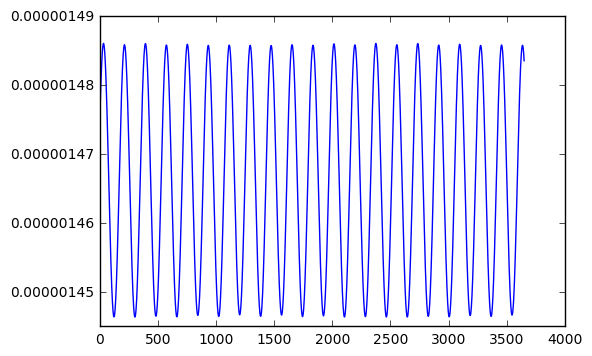

In [68]:
kinetic_energy = []
for i in range(len(x_earth)):
    velocity_squared = vx_earth[i]**2+vy_earth[i]**2+vz_earth[i]**2
    kinetic_energy.append(0.5*earth.mass*velocity_squared)
plt.plot(kinetc_energy)

Kinetic energy behaves peridocially as we expect it to.

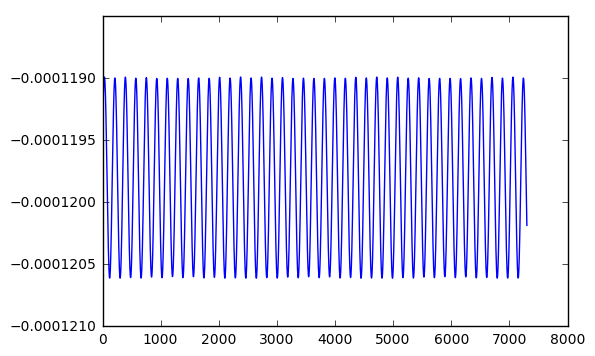

In [69]:
potential_energy = []
for i in range(len(x_earth)):
    radius = (x_earth[i]**2+y_earth[i]**2+z_earth[i]**2)**(0.5)
    potential_energy.append(-4*math.pi**2*earth.mass*sun.mass/radius)
plt.plot(potential_energy)

As does potential energy.

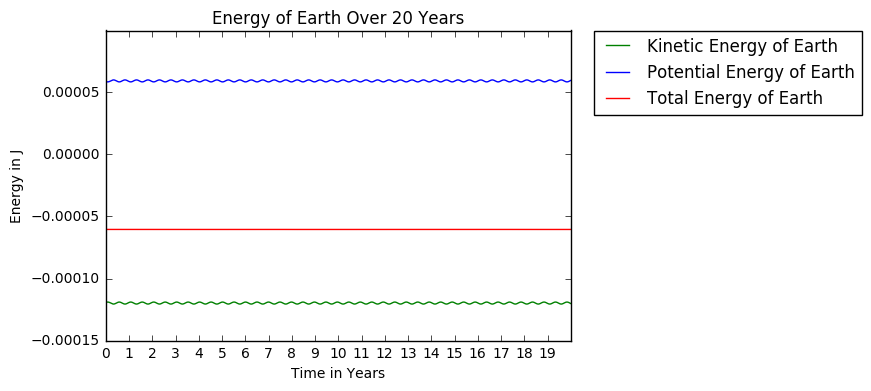

In [71]:
plt.title("Energy of Earth Over 20 Years")
plt.xlabel("Time in Years")
plt.ylabel("Energy in J")
x = []
for i in range(20):
    x.append(365*i)
xlab = ['0','1','2','3','4','5','6','7','8','9','10', '11','12', '13', '14', '15', '16','17', '18', '19', '20']
plt.xticks(x,xlab)
kin, = plt.plot(potential_energy, 'g', label='Kinetic Energy of Earth')
pot, = plt.plot(kinetic_energy, 'b', label ='Potential Energy of Earth')
total_energy = []
for i in range(len(potential_energy)):
    total_energy.append(potential_energy[i]+kinetic_energy[i])
tot, = plt.plot(total_energy, 'r', label='Total Energy of Earth')
plt.legend(handles = [kin, pot, tot])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The above plot shows that the total energy of Earth remains constant over 10 years. We can safely assume from this small scale test that we have proved conservation of energy in the motion of heavenly bodies. Now, there may be some variance for other planets or other time scales, so I will show a similar plot for another planet, Mercury.

In [73]:
x_mer = justone(20,  mercury, earth, venus, mars, jupiter, saturn, uranus, neptune, pluto)[0]
y_mer = justone(20,  mercury, earth, venus, mars, jupiter, saturn, uranus, neptune, pluto)[1]
z_mer = justone(20,  mercury, earth, venus, mars, jupiter, saturn, uranus, neptune, pluto)[2]
vx_mer = justone(20, mercury, earth, venus, mars, jupiter, saturn, uranus, neptune, pluto)[3]
vy_mer = justone(20, mercury, earth, venus, mars, jupiter, saturn, uranus, neptune, pluto)[4]
vz_mer = justone(20, mercury, earth, venus, mars, jupiter, saturn, uranus, neptune, pluto)[5]

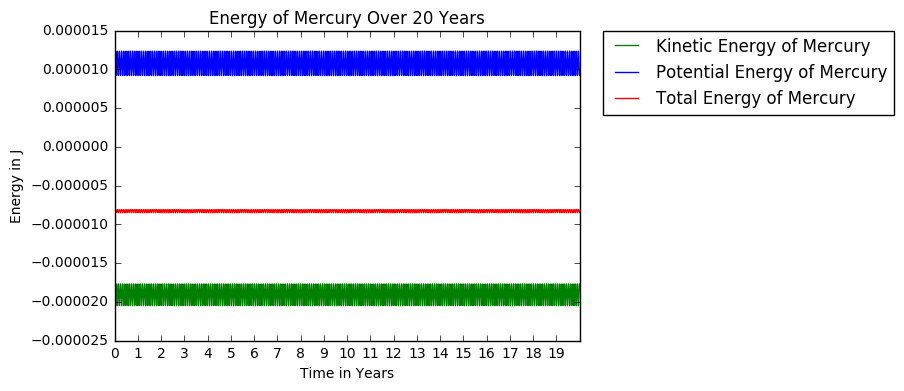

In [74]:
kinetic_energy_mer = []
for i in range(len(x_mer)):
    velocity_squared = vx_mer[i]**2+vy_mer[i]**2+vz_mer[i]**2
    kinetic_energy_mer.append(0.5*mercury.mass*velocity_squared)
potential_energy_mer = []
for i in range(len(x_mer)):
    radius = (x_mer[i]**2+y_mer[i]**2+z_mer[i]**2)**(0.5)
    potential_energy_mer.append(-4*math.pi**2*mercury.mass*sun.mass/radius)
plt.title("Energy of Mercury Over 20 Years")
plt.xlabel("Time in Years")
plt.ylabel("Energy in J")
x = []
for i in range(20):
    x.append(365*i)
xlab = ['0','1','2','3','4','5','6','7','8','9','10', '11','12', '13', '14', '15', '16','17', '18', '19', '20']
plt.xticks(x,xlab)
kin, = plt.plot(potential_energy_mer, 'g', label='Kinetic Energy of Mercury')
pot, = plt.plot(kinetic_energy_mer, 'b', label ='Potential Energy of Mercury')
total_energy_mer = []
for i in range(len(potential_energy_mer)):
    total_energy_mer.append(potential_energy_mer[i]+kinetic_energy_mer[i])
tot, = plt.plot(total_energy_mer, 'r', label='Total Energy of Mercury')
plt.legend(handles = [kin, pot, tot])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There appears to be some small fluctuations in Mercury's total energy.

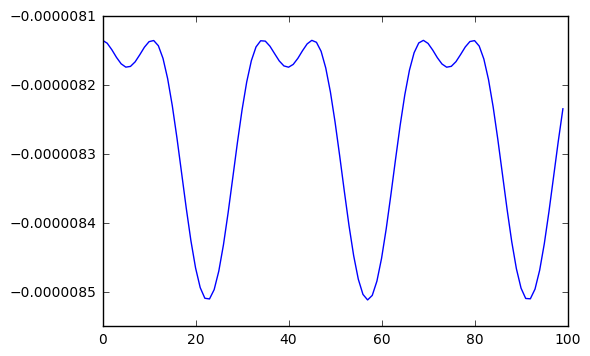

In [77]:
plt.plot(total_energy_mer[0:100])

The above plot shows the fluctuation in Mercury's total energy. This is due to some missing corrections for relativistic effects that we left out of our calculations, but is in no way indiciative that our model does not hold up or that conservation of energy is violated. The total energy flcutuates by 0.0000004, which is negligibly small and nearly 0. This does make a very interesting plot though.

Just to be certain, I will plot the total energy of Saturn to make sure we see the trend of conservation of energy.

In [78]:
x_sat = justone(20,  saturn, earth, venus, mars, jupiter, mercury, uranus, neptune, pluto)[0]
y_sat = justone(20,  saturn, earth, venus, mars, jupiter, mercury, uranus, neptune, pluto)[1]
z_sat = justone(20,  saturn, earth, venus, mars, jupiter, mercury, uranus, neptune, pluto)[2]
vx_sat = justone(20, saturn, earth, venus, mars, jupiter, mercury, uranus, neptune, pluto)[3]
vy_sat = justone(20, saturn, earth, venus, mars, jupiter, mercury, uranus, neptune, pluto)[4]
vz_sat = justone(20, saturn, earth, venus, mars, jupiter, mercury, uranus, neptune, pluto)[5]

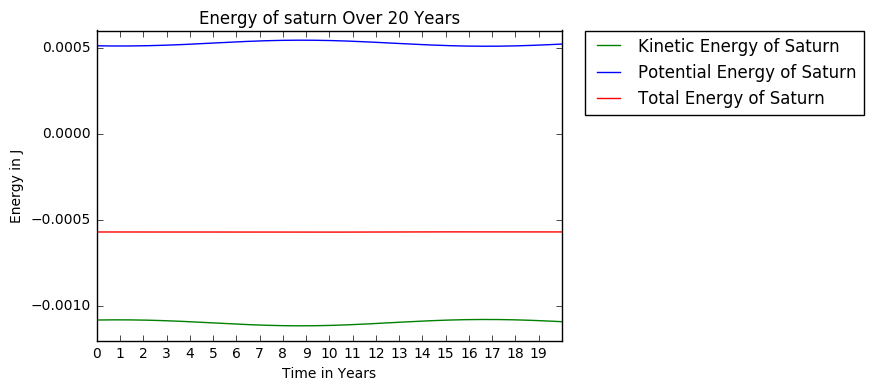

In [79]:
kinetic_energy_sat = []
for i in range(len(x_sat)):
    velocity_squared = vx_sat[i]**2+vy_sat[i]**2+vz_sat[i]**2
    kinetic_energy_sat.append(0.5*saturn.mass*velocity_squared)
potential_energy_sat = []
for i in range(len(x_sat)):
    radius = (x_sat[i]**2+y_sat[i]**2+z_sat[i]**2)**(0.5)
    potential_energy_sat.append(-4*math.pi**2*saturn.mass*sun.mass/radius)
plt.title("Energy of saturn Over 20 Years")
plt.xlabel("Time in Years")
plt.ylabel("Energy in J")
x = []
for i in range(20):
    x.append(365*i)
xlab = ['0','1','2','3','4','5','6','7','8','9','10', '11','12', '13', '14', '15', '16','17', '18', '19', '20']
plt.xticks(x,xlab)
kin, = plt.plot(potential_energy_sat, 'g', label='Kinetic Energy of Saturn')
pot, = plt.plot(kinetic_energy_sat, 'b', label ='Potential Energy of Saturn')
total_energy_sat = []
for i in range(len(potential_energy_sat)):
    total_energy_sat.append(potential_energy_sat[i]+kinetic_energy_sat[i])
tot, = plt.plot(total_energy_sat, 'r', label='Total Energy of Saturn')
plt.legend(handles = [kin, pot, tot])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

So, for Earth and Saturn, we conservation of energy holds true. We can blame any inconcistencies with the law of conservation of energy on any additional interactions going on that we chose to ignore in our code.